# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/adith/british_airway_analytics/data/raw/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# Checking the skweness and normality of the dataset

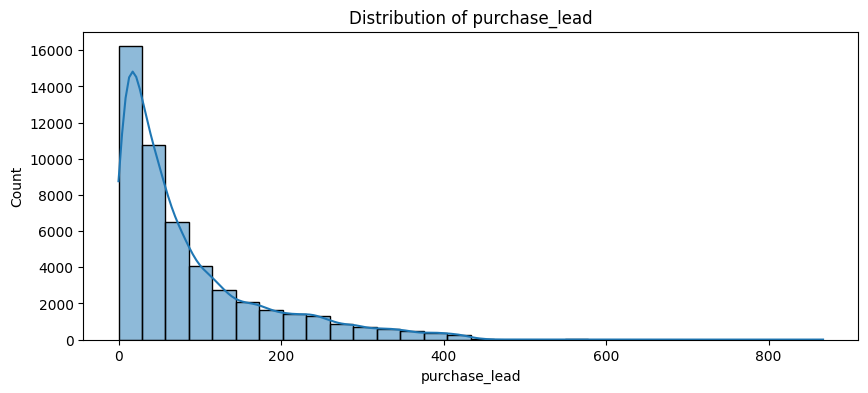

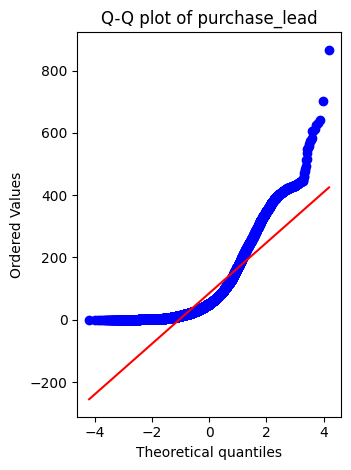

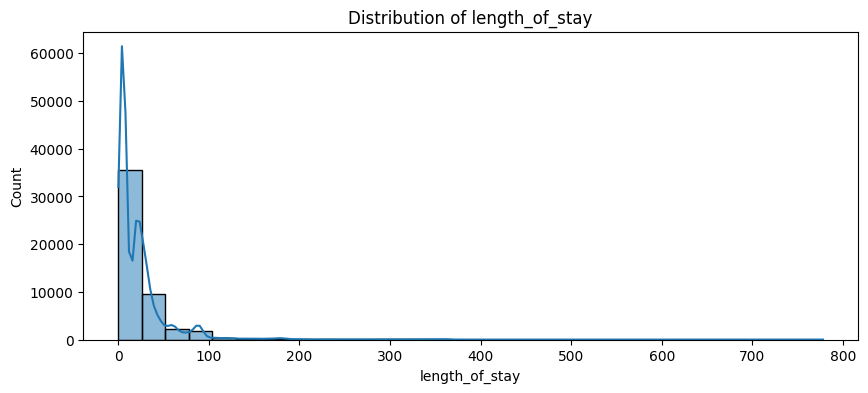

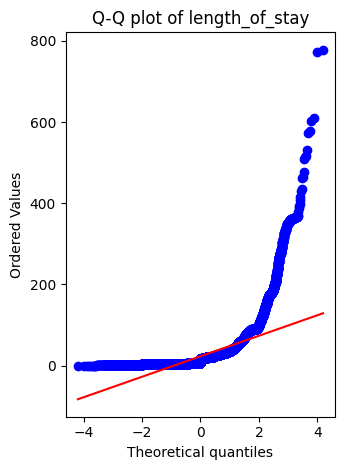

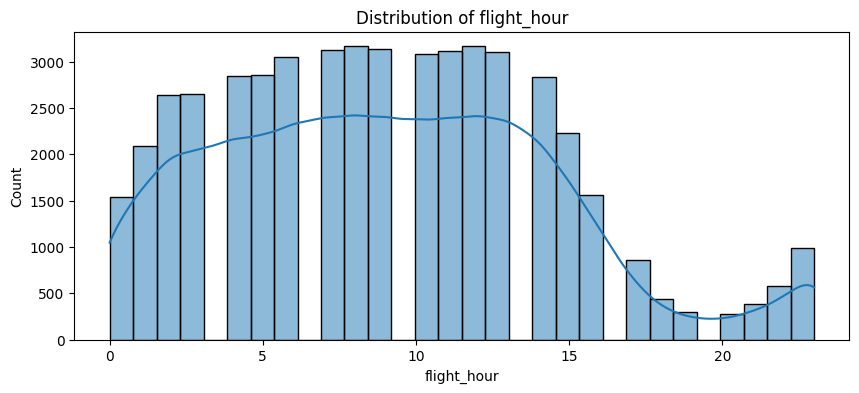

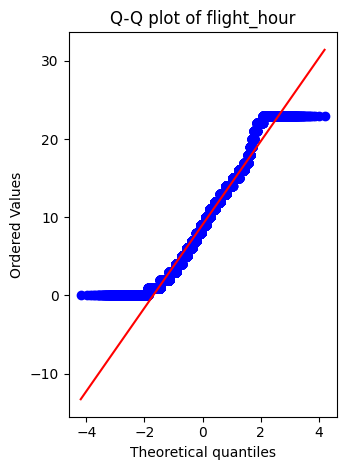

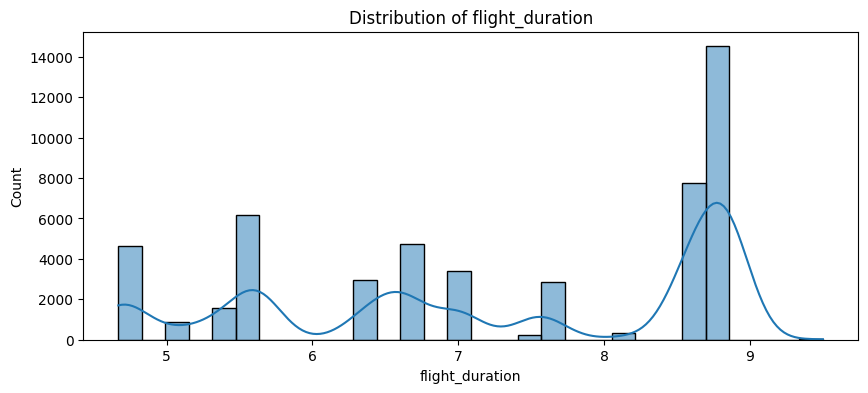

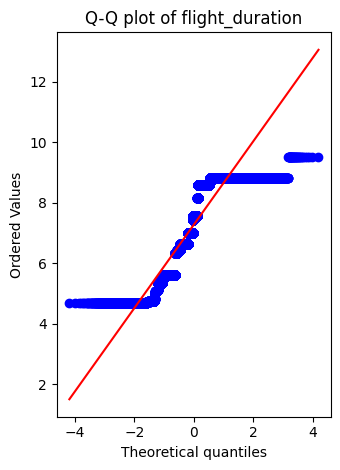

                 Skewness Normality (by skewness rule)
purchase_lead    1.653035                     No/Maybe
length_of_stay   5.274743                     No/Maybe
flight_hour      0.396623                          Yes
flight_duration  -0.36008                          Yes


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
#step 1: Identify continuous features manually
# (exclude binary features and ordinal encodings like 'flight_day')
binary_like = ["wants_extra_baggage", "wants_preferred_seat","wants_in_flight_meals", "booking_complete"]
ordinal_like = ["flight_day", "num_passengers"]
# skweness can only be calulated for numerical features so extract only the numerical features
numerical_features = [col for col in df.select_dtypes(include=['float64', 'int64']).columns
                       if col not in binary_like + ordinal_like]
results = {}
for feature in numerical_features:
    plt.figure(figsize=(10,4))
    sns.histplot(df[feature], kde=True, bins =30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

    # Q-Qplot
    plt.subplot(1, 2,2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {feature}')
    plt.tight_layout()
    plt.show()
    # calculate skewness
    skewness = df[feature].skew()
    results[feature] = {
        "Skewness" : skewness,
        f"Normality (by skewness rule)": "Yes" if abs(skewness) < 0.5 else "No/Maybe"
    }
    
#Print summary table
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

Mastering Skewness:
Skewed data can adversly affect performance of machine learning models leading to inaccurate predictions and biased results.

Skewness --> asymetric (tail of the distribution is long on one side than the other)

two forms of skewness:
1. Postivie skewness (right skewed) --> tail of the distribution extends to the right indicates that majority of the data points are concentrated on the left side with fe outliers on the right.
2. negative skewness: (left skewed) --> tail of the distribution extends to the left indicating that majority of the data points are concentrated to the right side with few outliers on the left.

Implications of Skewed Data in Machine Learning: Skewed data can pose several challenges in the context of machine learning:

Biased Models: Machine learning models trained on skewed data may exhibit bias towards the majority class or the dominant range of values, leading to poor generalization performance on unseen data.

Inaccurate Predictions: Skewed data can distort the relationship between input features and target variables, resulting in inaccurate predictions and unreliable insights.
Suboptimal Performance: Skewed data can hinder the performance of various machine learning algorithms, especially those that assume a normal distribution of data, such as linear regression and logistic regression.

### the shapiro-wilk test

tool for assessing normality

The Shapiro-Wilk test is a statistical test used to determine whether a sample comes from a normally distributed population. 

the formula:
$$
W = \frac{\left( \sum_{i=1}^n a_i x_{(i)} \right)^2}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

x(i) : ordered sample values (from smallest to largest)
xbar : sample mean
ai: Constants derieved from the expected values of the order statistics of a normal distribution.

if the data are normally distributed the ordered values should closely match the expected values from the normal distribution leading to a W close to 1.

After perfoming the test the key result is p-value:
if p> a (commonly 0.05): Fail to reject the null hypothesis the data appears to be normally distributed.
if p<= a: reject the null hypothesis the data do not appear to follow a normal distributon.

Shapiro-Wilk test is best for small to moderately sized datasets (n < 2000).

For large samples (n > 2000), it becomes too sensitive. Even the tiniest deviation from perfect normality will produce a tiny p-value → misleading you into rejecting normality even when the data is “normal enough” for practical purposes.

Now, in your case (n = 5000):

Running Shapiro-Wilk is not wrong, but you shouldn’t trust it alone. You’ll almost certainly get a rejection of normality (p < 0.05) just because of the sample size.

That’s why for large n we pair:

Visual checks → histograms, KDE plots, Q-Q plots.

Alternative tests → Anderson-Darling, Kolmogorov-Smirnov (but even these can suffer from sensitivity issues with big n).

Practical check → If your ML model isn’t strictly assuming normality (e.g., Random Forest, Gradient Boosting), slight non-normality isn’t a problem.

 
​





### Intrepreting the Q-Q plot

Q-Q plot observed data quantiles are plotted against theoretical quantiles.

if the data closely follows the theoretical distribution the points on the Q-Q plot will move along the diagonal line.
deviations from this line indicate departure from the expected distribution.
points that fall above or below the line suggest skewness or outliers and patterns such as curves or s-shaped deviations indicate systematic differences like heavier or lighter tails.

three patterns to look out for in a q-q plot:

1. straight line: Data aligns with the theoretical distribution.

2. Curved Patterns: indicated skewed data or non-normal distributions.

3. Heavy or Light Tails: if points deviate at the ends the data might have heavier or lighter tails than expected.



## FEATURE SELECTION EDA

Categorical features – how are they distributed, and how do they relate to the target (booking_complete)?

Numerical features – correlation with target, separation between booked (1) vs not booked (0).

Binary indicators – how much they improve booking probability.

### 1. target distribution

here our target variable is booking_complete
check for:
--> % 1s vs 0s class balance.
--> if skewed consider stratified sampling/resampling.


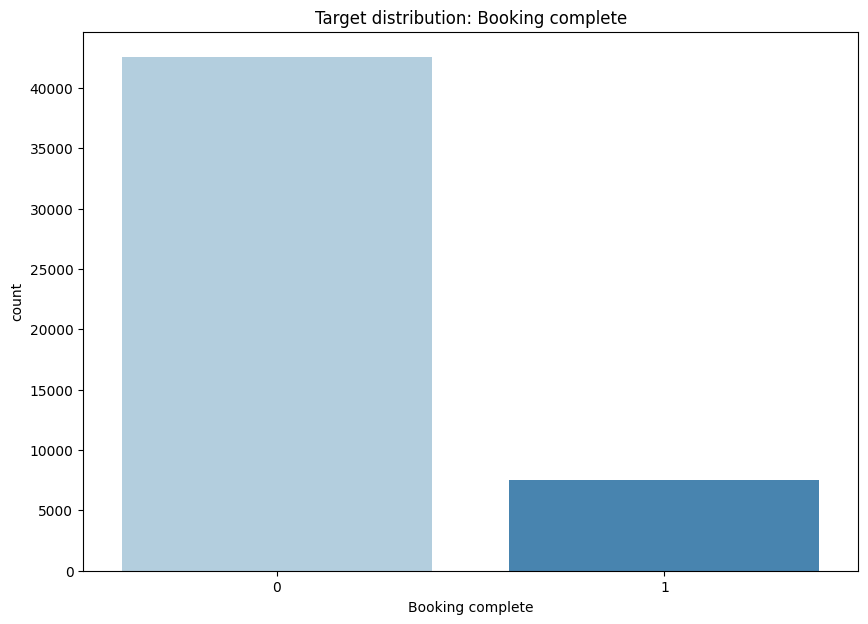

Target Distribution (%):
booking_complete
0    85.044
1    14.956
Name: proportion, dtype: float64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the distribution
plt.figure(figsize=(10,7))
sns.countplot(x="booking_complete", data=df, palette="Blues", hue="booking_complete", legend=False)
plt.title("Target distribution: Booking complete")
plt.xlabel("Booking complete")
plt.ylabel("count")
plt.show()

#Calculate the percentage split
target_dist = df["booking_complete"].value_counts(normalize=True)*100
print("Target Distribution (%):")
print(target_dist)

### Handling class imbalance data

--> techniques like oversampling the minority class or undersampling the majority class are used to resample the data.

--> using assessment measures such as precision, recall or f1 score for accurcy csn be done.

--> to further imporove the handling of imbalanced datasets for more reailabe and suitable prediction specialized techniques such as ensemble approachrd and incporporation of synthetic genteration can be used.

Handling imabalance dat is as follows:

1. Different Evaluation Metric --> in imabalanced datasets the F1 score emerges as a preferred metric striking a balance between precision and recall.

2. Resampling (UnderSampling and overSampling) this method involves adjusting the balance between minority and majority class. through upsampling or downsampling.

what does this mean in an imbalanced dataset? --> 
Oversampling: the minority class is increased to match the majority class.
Undersampling: Randomly removing rows from the majority class to align with the minority class.

3. BalanceBaggingClassifier: when dealing with imbalanced datasets, traditional classifiers tend to favor the majority class neglecting the minority class due to it's lower representation.
BalancedBaggingClassifier--> is an sklearn classfier that addresses this imbalance by incorporating additional balancing during training.
parameters: sampling_strategy --> determining the type of resampling (majority--> for resampling only majority class and all--> for resampling all classes.).

4. SMOTE : Synthetic Minority Oversampling Technique (SMOTE) addresses imbalanced datasets by synthetically generating new instances for the minority class.
Unlike simply duplicating records SMOTE enhances diversity by creating artificial instances in minority classes.

5. Threshold moving: In classifiers thresholds for assigning predictions to classes is typically set at 0.5. in case of imbalanced datasets this may not yield optimal results.
Techniques like ROC curves and Precision-Recall Curves are employed to identify the optimal threshold. Grid search methods or exploration within a specified range of values can be utilized to pinpoint most suitable threshold for the classifier.

6. Tree Based Models: Decsion trees--> dividing the feature space into regions according to feature values. By changing the decision boundaries to incorporate miniorty class patterns decision trees can react to data imbalance but they might experience overfitting.
random forests --> are made up of many decision trees that have been trained using arbitrary subsets of features and data. --> improve generalization by reducing overfitting and strengthing robustness against imbalance datasets by mixing numerous trees.
gradient boosted trees: Boosted trees --> grow in a sequential manner with each new growth repairing the mistakes of the older one.these perform well in imbalanced circmstances cause of their ability to concntrate on misclassified occurences through sequential learning. could be noise sensitive.

7. Anomaly Detection Algorithms: help in identifying the outliers in an imbalanced dataset Majority classes record as normal data and Minority as Outlier data. --> trained model can predict if the new record is Normal or outlier.







### 2. Categorical Features EDA

#### Sales_Channel

sales_channel
Internet    88.764
Mobile      11.236
Name: proportion, dtype: float64


C:\Users\adith\AppData\Local\Temp\ipykernel_29316\2995575664.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


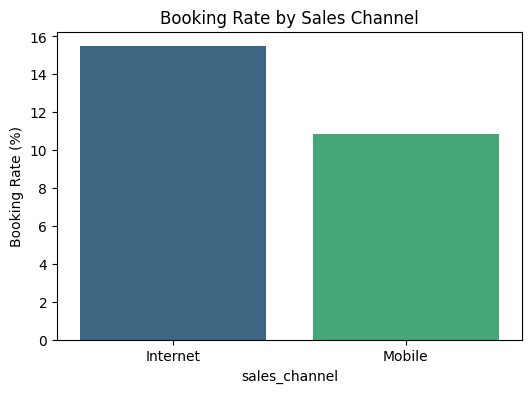

In [11]:
#check_distribution
df['sales_channel'].value_counts(normalize=True) * 100
# how common online vs offline channels are
sales_channel_booking_rate = (
    df.groupby('sales_channel')['booking_complete']
    .mean()
    .reset_index()
    .sort_values(by='booking_complete', ascending=False)
)
sales_channel_booking_rate['booking_complete']*=100  #convert to %
print(df['sales_channel'].value_counts(normalize=True)*100)
#plot our distribution
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sales_channel_booking_rate,
    x='sales_channel',
    y='booking_complete',
    palette='viridis',
)
plt.ylabel('Booking Rate (%)')
plt.title('Booking Rate by Sales Channel')
plt.show()

#### Booking rate by trip_type


trip_type
RoundTrip     98.994
OneWay         0.774
CircleTrip     0.232
Name: proportion, dtype: float64


C:\Users\adith\AppData\Local\Temp\ipykernel_29316\2483746971.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


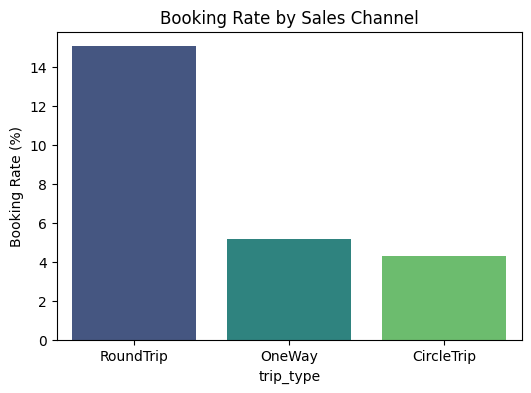

In [12]:
trip_type_booking_rate = (
    df.groupby('trip_type')['booking_complete']
    .mean()
    .reset_index()
    .sort_values(by='booking_complete', ascending=False)
)
trip_type_booking_rate['booking_complete']*=100  #convert to %
print(df['trip_type'].value_counts(normalize=True)*100)
#plot our distribution
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.barplot(
    data=trip_type_booking_rate,
    x='trip_type',
    y='booking_complete',
    palette='viridis',
)
plt.ylabel('Booking Rate (%)')
plt.title('Booking Rate by Sales Channel')
plt.show()

#### Route Analysis

In [13]:
print(df['route'].nunique())
df['route'].value_counts().head(10)

799


route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
ICNSYD     695
DMKPER     679
DPSICN     666
DMKOOL     655
MELPEN     649
Name: count, dtype: int64

##### How common are the top routes?

if the distribution is extremly long-tailed or skewed top_routes are < 30% of data and rest are rare then we will either need to:

--> group rare ones 

--> risk having too many noise categories.


In [14]:
route_counts = df['route'].value_counts()
print(route_counts.head(15))
print(f"Top 15 routes coverage: {route_counts.head(15).sum() / len(df) * 100:.2f}%")
print(f"Routes with < 50 samples: {(route_counts < 50).sum()} ({(route_counts < 50).sum() / len(route_counts) * 100:.2f}%)")

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
ICNSYD     695
DMKPER     679
DPSICN     666
DMKOOL     655
MELPEN     649
MELTPE     644
SGNSYD     614
DMKSYD     532
COKSYD     511
COKMEL     474
Name: count, dtype: int64
Top 15 routes coverage: 24.22%
Routes with < 50 samples: 583 (72.97%)


##### is booking rate different per route?

what are we really looking for here?

if the conversion rates varies widely across routes then route carries signal.

if all the booking rates hover around the same % it's just noise.


In [15]:
route_booking_rate = df.groupby('route')['booking_complete'].mean()
print(route_booking_rate.describe())
route_booking_rate.sort_values(ascending=False).head(15)

count    799.000000
mean       0.154466
std        0.188338
min        0.000000
25%        0.000000
50%        0.105263
75%        0.228869
max        1.000000
Name: booking_complete, dtype: float64


route
AORPER    1.000000
MELNRT    1.000000
KOSSYD    1.000000
KCHMRU    1.000000
KTMURT    1.000000
CKGKNO    1.000000
HDYOOL    1.000000
TGGXIY    1.000000
AORPUS    1.000000
CXRMEL    1.000000
JEDPEN    1.000000
CKGSGN    1.000000
JOGKTM    1.000000
BKIKTM    0.833333
AKLPEK    0.800000
Name: booking_complete, dtype: float64

##### compare signal strength with simpler categorical features

if route has high signal but other low-cardinality features like trip_type, sales_channel already explain a lot of it, the route might be redundant.

Decision rule we’ll follow:

If coverage of top routes is low AND booking rate variation is low → drop it.

If booking rate variation is high → keep it, but plan CV-safe target encoding.

If MI score is near zero → drop it, even if variation exists (variation might be random noise).


In [16]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

X= df[['route']]
y= df['booking_complete']
mi_score = mutual_info_classif(X.apply(lambda col: col.astype('category').cat.codes), y, discrete_features=True)
print(f"Mutual Information score for route: {mi_score[0]:.4f}")


Mutual Information score for route: 0.0610


In [17]:
route_counts = df['route'].value_counts()
route_booking_rate = df.groupby('route')['booking_complete'].mean()

high_rates = route_booking_rate[route_booking_rate >= 0.9]   # routes with ≥90% booking rate
summary = pd.DataFrame({
    'count': route_counts,
    'booking_rate': route_booking_rate
}).loc[high_rates.index].sort_values('count', ascending=False)

print(summary.head(30))


        count  booking_rate
route                      
HDYOOL      5           1.0
TGGXIY      2           1.0
CKGKNO      1           1.0
AORPUS      1           1.0
AORPER      1           1.0
CXRMEL      1           1.0
CKGSGN      1           1.0
JOGKTM      1           1.0
JEDPEN      1           1.0
KCHMRU      1           1.0
KOSSYD      1           1.0
KTMURT      1           1.0
MELNRT      1           1.0


##### Booking_origin Analysis



In [18]:
print(df['booking_origin'].nunique())
booking_origin_counts = df['booking_origin'].value_counts()
print(f"Top 10 booking origin coverage: {booking_origin_counts.head(10).sum()/len(df)*100:.4f}")
print(f"Booking origin with < 50 bookings: {(booking_origin_counts< 50).sum()} ({(booking_origin_counts<50).sum()/len(booking_origin_counts)*100:.4f}%)")
booking_origin_booking_rate = df.groupby('booking_origin')['booking_complete'].mean()
#booking_origin_booking_rate['booking_complete']*= 100
# Signal_strength_check
X_fd = df[['booking_origin']]
y_fd = df['booking_complete']
high_rates1 = booking_origin_booking_rate[booking_origin_booking_rate >= 0.9]
summary_booking = pd.DataFrame({
     'booking_origin_counts': booking_origin_counts,
     'booking_origin_booking_rate': booking_origin_booking_rate
}).loc[high_rates1.index].sort_values('booking_origin_counts', ascending=False)
print("summary:", summary_booking.head(10))
#mi score
X1 = df[['booking_origin']]
Y1 = df['booking_complete']
mi_score1 = mutual_info_classif(X1.apply(lambda col: col.astype('category').cat.codes), Y1, discrete_features=True)
print(f"Mutual info score for booking_origin: {mi_score[0]:.4f}")

104
Top 10 booking origin coverage: 91.3940
Booking origin with < 50 bookings: 78 (75.0000%)
summary:                 booking_origin_counts  booking_origin_booking_rate
booking_origin                                                    
Iraq                                1                          1.0
Pakistan                            1                          1.0
Seychelles                          1                          1.0
Vanuatu                             1                          1.0
Mutual info score for booking_origin: 0.0610


#### flight of the day

flight day distribution (%):
flight_day
1    16.204
2    15.346
3    15.348
4    14.848
5    13.522
6    11.624
7    13.108
Name: proportion, dtype: float64


C:\Users\adith\AppData\Local\Temp\ipykernel_29316\1597056336.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\adith\AppData\Local\Temp\ipykernel_29316\1597056336.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="flight_day")


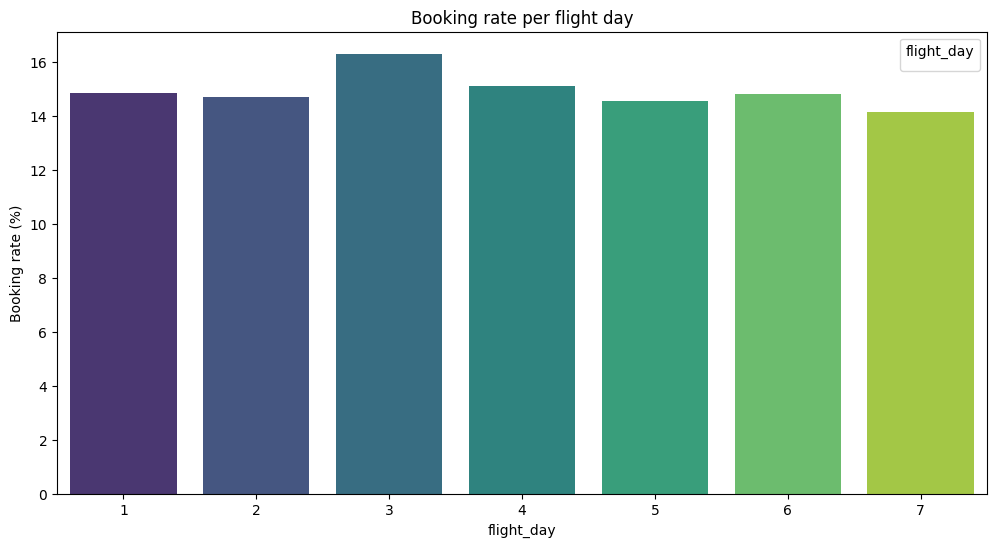


Mutual Information score for flight_day: 0.0002


In [19]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
#Distribution
day_counts = df["flight_day"].value_counts(normalize=True)*100
print("flight day distribution (%):")
print(day_counts.sort_index())
#Booking rate per day
booking_rate_by_day = df.groupby("flight_day")["booking_complete"].mean().reset_index().sort_values(by="booking_complete", ascending=False)
booking_rate_by_day["booking_complete"]*=100
plt.figure(figsize=(12,6))
sns.barplot(
    data=booking_rate_by_day,
    x="flight_day",
    y="booking_complete",
    palette='viridis'

)
plt.ylabel("Booking rate (%)")
plt.title("Booking rate per flight day")
plt.legend(title="flight_day")
plt.show()
# Signal_strength_check
X_fd = df[['flight_day']]
y_fd = df['booking_complete']

mi_score_fd = mutual_info_classif(
    X_fd.apply(lambda col: col.astype("category").cat.codes),
    y_fd,
    discrete_features=True,
)
print(f"\nMutual Information score for flight_day: {mi_score_fd[0]:.4f}")

## Numerical Features EDA

#### 1. Purchase Lead
question we are trying to answer: Do passengers who book earlier have a different likelihood of booking compared to last-minute buyers?


C:\Users\adith\AppData\Local\Temp\ipykernel_29316\2202668978.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('purchase_lead_bin')['booking_complete']
C:\Users\adith\AppData\Local\Temp\ipykernel_29316\2202668978.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


purchase_lead_bin
30+days       65.722
15-30 days    16.568
4-41 days     13.108
0-3 days       4.602
Name: proportion, dtype: float64


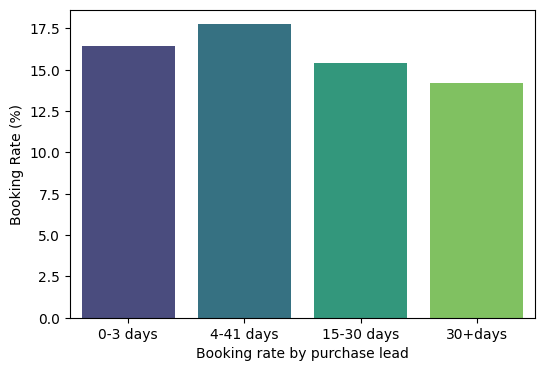


Mutual Information score for flight_duration: 0.003


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
bins = [0, 3, 14, 30, df['purchase_lead'].max()]
labels = ['0-3 days', '4-41 days', '15-30 days', '30+days']
df['purchase_lead_bin'] = pd.cut(df['purchase_lead'], bins=bins, labels=labels, include_lowest=True)
purchase_lead_booking_rate = (
    df.groupby('purchase_lead_bin')['booking_complete']
    .mean()
    .reset_index()
    .sort_values(by='booking_complete', ascending=False)
)
purchase_lead_booking_rate['booking_complete'] *= 100 
print(df['purchase_lead_bin'].value_counts(normalize=True)*100)#Convert to %
plt.figure(figsize=(6,4))
sns.barplot(
    data=purchase_lead_booking_rate,
    x='purchase_lead_bin',
    y='booking_complete',
    palette='viridis'
)
plt.ylabel('Booking Rate (%)')
plt.xlabel("Booking rate by purchase lead")
plt.show()
X_pl = df[['purchase_lead']]
y_pl = df['booking_complete']
mi_score_pl = mutual_info_classif(X_pl, y_pl, discrete_features=False)
print(f"\nMutual Information score for flight_duration: {mi_score_pl[0]:.3f}")

#### Lenth_of_stay
We’ll use ranges that make sense in travel terms:

1–3 days → short trips / weekend trips / business

4–7 days → medium stays (common for leisure)

8–14 days → long leisure trips

15+ days → extended stays / relocation / visiting family

C:\Users\adith\AppData\Local\Temp\ipykernel_29316\194420294.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('length_of_stay_bin')['booking_complete']
C:\Users\adith\AppData\Local\Temp\ipykernel_29316\194420294.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


purchase_lead_bin
30+days       3286100
15-30 days     828400
4-41 days      655400
0-3 days       230100
Name: count, dtype: int64
0           30+days
1           30+days
2           30+days
3           30+days
4           30+days
            ...    
49995    15-30 days
49996       30+days
49997    15-30 days
49998    15-30 days
49999    15-30 days
Name: purchase_lead_bin, Length: 50000, dtype: category
Categories (4, object): ['0-3 days' < '4-41 days' < '15-30 days' < '30+days']


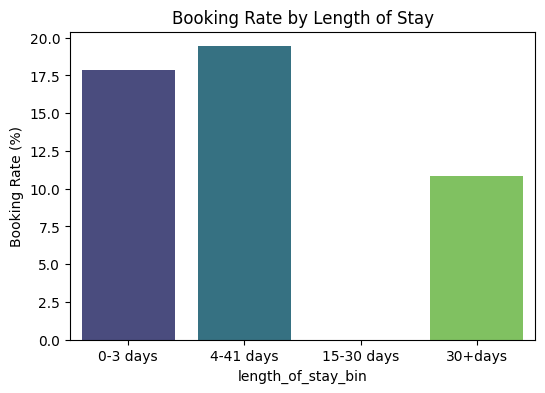


Mutual Information score for flight_duration: 0.010


In [34]:
bins = [0, 3, 7, 14 , df['length_of_stay'].max()]
label = ['1-3 days', '4-7days', '8-14 days, 15+ days']
df['length_of_stay_bin'] =pd.cut(df['length_of_stay'], bins=bins, labels=labels, include_lowest=True)
length_stay_booking_rate = (
    df.groupby('length_of_stay_bin')['booking_complete']
    .mean()
    .reset_index()
    .sort_values(by='booking_complete', ascending=False)
)
length_stay_booking_rate['booking_complete']*=100
print(df['purchase_lead_bin'].value_counts()*100)
print(df['purchase_lead_bin'])
plt.figure(figsize=(6, 4))
sns.barplot(
    data=length_stay_booking_rate,
    x='length_of_stay_bin',
    y='booking_complete',
    palette='viridis'
)
plt.ylabel('Booking Rate (%)')
plt.title('Booking Rate by Length of Stay') 
plt.show()
X_ls = df[['length_of_stay']]
y_ls = df['booking_complete']
mi_score_ls = mutual_info_classif(X_ls, y_ls, discrete_features=False)
print(f"\nMutual Information score for flight_duration: {mi_score_ls[0]:.3f}")


Length of the day requires further analysis


### Flight Hour

flight_hour
8     6.330
12    6.326
9     6.264
7     6.252
11    6.220
13    6.202
10    6.170
6     6.100
5     5.702
4     5.686
14    5.666
3     5.310
2     5.284
15    4.468
1     4.178
16    3.114
0     3.078
23    1.972
17    1.722
22    1.158
18    0.878
21    0.778
19    0.590
20    0.552
Name: proportion, dtype: float64


C:\Users\adith\AppData\Local\Temp\ipykernel_29316\1688842806.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


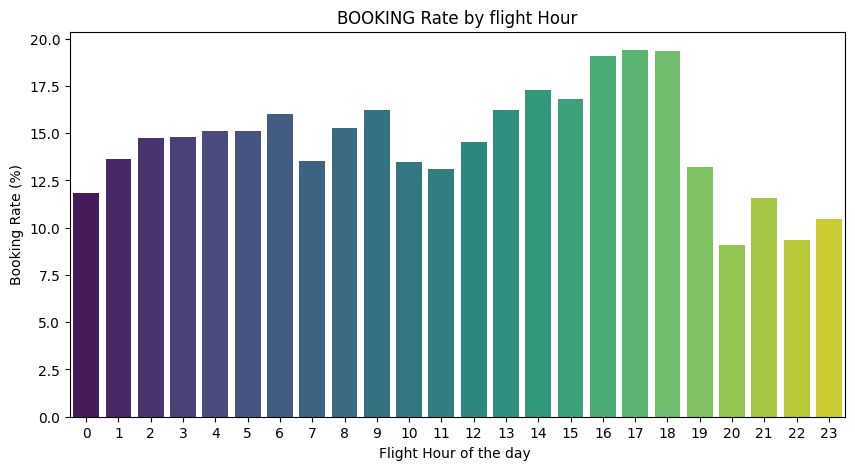

C:\Users\adith\AppData\Local\Temp\ipykernel_29316\1688842806.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


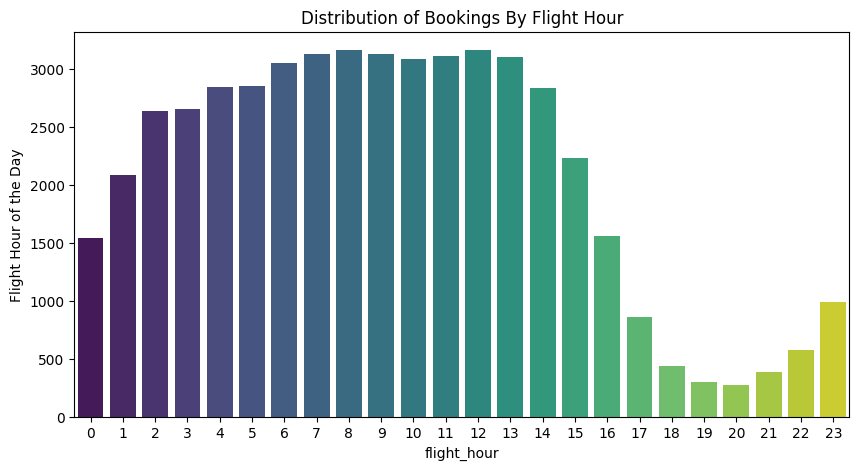


Mutual Information score for flight_duration: 0.001


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
flight_hour_booking_rate = (
    df.groupby('flight_hour')['booking_complete']
    .mean()
    .reset_index()
    .sort_values(by='booking_complete', ascending=False)

)
# covert the booking rate to %
flight_hour_booking_rate['booking_complete'] *= 100
#Distribution of bookings per hour
print(df['flight_hour'].value_counts(normalize=True)*100) # % distribution
plt.figure(figsize=(10, 5))
sns.barplot(
    data=flight_hour_booking_rate,
    x='flight_hour',
    y='booking_complete',
    palette='viridis'
)
plt.ylabel('Booking Rate (%)')
plt.xlabel('Flight Hour of the day ')
plt.title('BOOKING Rate by flight Hour')
plt.show()
#optional: Distribution of flight hours (count plot)
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='flight_hour',
    palette='viridis'
)
plt.ylabel('Number of Bookings')
plt.ylabel('Flight Hour of the Day')
plt.title('Distribution of Bookings By Flight Hour')
plt.show()
X_fh = df[['flight_hour']]
y_fh = df['booking_complete']
mi_score_fh = mutual_info_classif(X_fh, y_fh, discrete_features=False)
print(f"\nMutual Information score for flight_duration: {mi_score_fh[0]:.3f}")


needs preprocessing later on probably encoding it as a cyclic features like sin/cosine or bucketing.

### Flight Duration

Missing Values in flight durations: 0

Descriptive stats for flight_duration:
count    50000.000000
mean         7.277561
std          1.496863
min          4.670000
25%          5.620000
50%          7.570000
75%          8.830000
max          9.500000
Name: flight_duration, dtype: float64

Number of outliers in flight_duration: 0


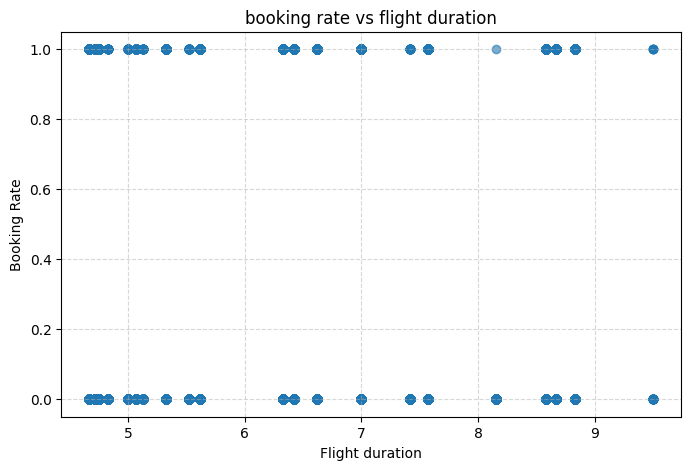

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
# 1. Missing values
missing_count = df['flight_duration'].isna().sum()
print(f"Missing Values in flight durations: {missing_count}")
#2. Descriptive stats
print("\nDescriptive stats for flight_duration:")
print(df['flight_duration'].describe())

#Outlier Detection (IQR method)
Q1 = df['flight_duration'].quantile(0.25)
Q3 = df['flight_duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['flight_duration'] < lower_bound) | (df['flight_duration'] > upper_bound)]
print(f"\nNumber of outliers in flight_duration: {len(outliers)}")
plt.figure(figsize=(8,5))
plt.scatter(df['flight_duration'], df['booking_complete'], alpha=0.6)
plt.xlabel("Flight duration")
plt.ylabel("Booking Rate")
plt.title("booking rate vs flight duration")
plt.grid(True, linestyle='--' , alpha=0.5)
plt.show()



Flight Duration distribution(%)
flight_duration
4.67    0.05486
4.72    0.01004
4.75    0.02510
4.83    0.00312
5.00    0.00482
5.07    0.01024
5.13    0.00250
5.33    0.03108
5.52    0.01334
5.62    0.11048
6.33    0.02380
6.42    0.03474
6.62    0.09442
7.00    0.06748
7.42    0.00448
7.57    0.05670
8.15    0.00622
8.58    0.13930
8.67    0.01614
8.83    0.29040
9.50    0.00074
Name: proportion, dtype: float64
    flight_duration  booking_complete
2              4.75         33.386454
7              5.33         24.839125
0              4.67         24.608093
1              4.72         24.103586
4              5.00         24.066390
5              5.07         23.632812
18             8.67         23.420074
6              5.13         22.400000
13             7.00         21.873148
11             6.42         21.416235


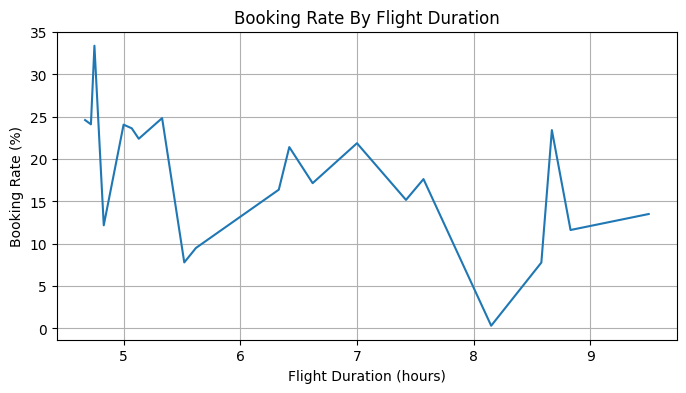


Mutual Information score for flight_duration: 0.016


In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_selection import mutual_info_classif
flight_duration_dist = df['flight_duration'].value_counts(normalize=True)
print("Flight Duration distribution(%)")
print(flight_duration_dist.sort_index())
flight_duration_booking_rate = (
    df.groupby("flight_duration")["booking_complete"]
    .mean()
    .reset_index()
    .sort_values(by='booking_complete', ascending=False)
)
flight_duration_booking_rate['booking_complete'] *= 100
print(flight_duration_booking_rate.head(10)) #top 10 for quich view
plt.figure(figsize=(8,4))
sns.lineplot(
    data=flight_duration_booking_rate,
    x='flight_duration',
    y='booking_complete',
    markers='o',
    
)
plt.ylabel('Booking Rate (%)')
plt.xlabel('Flight Duration (hours)')
plt.title('Booking Rate By Flight Duration')
plt.grid(True)
plt.show()
X_fd = df[['flight_duration']]
y_fd = df['booking_complete']
mi_score_fd = mutual_info_classif(X_fd, y_fd, discrete_features=False)
print(f"\nMutual Information score for flight_duration: {mi_score_fd[0]:.3f}")







Numerical Featues to Consider:

[purchase_lead, length_of_stay, flight_hour]

## 4. Binary Feature Analysis

why test them?
these features directly reflect willingness to pay. A customer who adds baggage, meal or seat preference is investing extra into the booking process--> indicates strong behavioural signal.

Hypothesis:

Customers who opt-in for extras are less likely to abandon booking (higher booking_complete_rate).

EXTRA BAGGAGE DISTRIBUTION (%):
wants_extra_baggage
1    0.66878
0    0.33122
Name: proportion, dtype: float64
\Booking rate by extra_baggage
   wants_extra_baggage  booking_complete
0                    0         11.502929
1                    1         16.666168


<>:17: SyntaxWarning: invalid escape sequence '\B'
<>:17: SyntaxWarning: invalid escape sequence '\B'
C:\Users\adith\AppData\Local\Temp\ipykernel_29316\641279125.py:17: SyntaxWarning: invalid escape sequence '\B'
  print("\Booking rate by extra_baggage")
C:\Users\adith\AppData\Local\Temp\ipykernel_29316\641279125.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


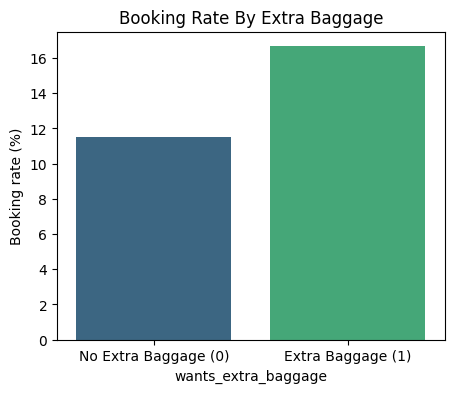


Mutual Information score for extra_baggage: 0.0024


C:\Users\adith\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
from locale import normalize
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.feature_selection import mutual_info_classif
#1 Distribution
extra_baggage_dist = df['wants_extra_baggage'].value_counts(normalize=True)
print("EXTRA BAGGAGE DISTRIBUTION (%):")
print(extra_baggage_dist)
# Step 2 - Booking rate per group
extra_baggage_booking_rate = (
    df.groupby('wants_extra_baggage')['booking_complete']
    .mean()
    .reset_index()
)
extra_baggage_booking_rate['booking_complete'] *= 100 # convert to %
print("\Booking rate by extra_baggage")
print(extra_baggage_booking_rate)
plt.figure(figsize=(5,4))
sns.barplot(
    data=extra_baggage_booking_rate,
    x='wants_extra_baggage',
    y='booking_complete',
    palette='viridis'
)
plt.xticks([0,1], ['No Extra Baggage (0)', 'Extra Baggage (1)'])
plt.ylabel("Booking rate (%)")
plt.title("Booking Rate By Extra Baggage")
plt.show()
X_eb = df[['wants_extra_baggage']]
y_eb = df[['booking_complete']]
mi_score_eb = mutual_info_classif(X_eb, y_eb, discrete_features=True)
print(f"\nMutual Information score for extra_baggage: {mi_score_eb[0]:.4f}")



### Preferred Seat

PREFERRED SEAT DISTRIBUTION (%)
wants_preferred_seat
0    0.70304
1    0.29696
Name: proportion, dtype: float64
   wants_preferred_seat  booking_complete
0                     0         13.794379
1                     1         17.706088


C:\Users\adith\AppData\Local\Temp\ipykernel_29316\2363149538.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


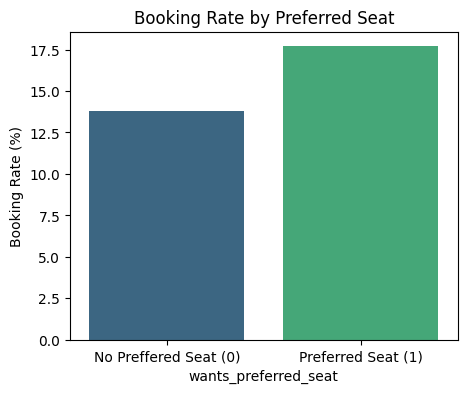


Mutual Information score for preferred_seat: 0.0012


In [26]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.feature_selection import mutual_info_classif

# 1 Distribution
preferred_seat_dist = df['wants_preferred_seat'].value_counts(normalize=True)
print("PREFERRED SEAT DISTRIBUTION (%)")
print(preferred_seat_dist)

#2 Booking rate per group
preferred_seat_booking_rate = (
    df.groupby('wants_preferred_seat')['booking_complete']
    .mean()
    .reset_index()  
)
preferred_seat_booking_rate["booking_complete"] *= 100
print(preferred_seat_booking_rate)

#3 plot booking rate
plt.figure(figsize=(5, 4))
sns.barplot(
    data=preferred_seat_booking_rate,
    x='wants_preferred_seat',
    y = 'booking_complete',
    palette='viridis'
)
plt.xticks([0, 1], ['No Preffered Seat (0)', 'Preferred Seat (1)'])
plt.ylabel("Booking Rate (%)")
plt.title("Booking Rate by Preferred Seat")
plt.show()

#4 Mutual Information score
X_ps = df[['wants_preferred_seat']]
y_ps = df['booking_complete']
mi_score = mutual_info_classif(X_ps, y_ps, discrete_features=True)
print(f"\nMutual Information score for preferred_seat: {mi_score[0]:.4f}")

### Wants_preferred_seat


INFLIGHT MEALS: (%)
wants_in_flight_meals
0    0.57286
1    0.42714
Name: proportion, dtype: float64

 Booking rate by inflight meals:
   wants_in_flight_meals  booking_complete
0                      0         14.139580
1                      1         16.050943


C:\Users\adith\AppData\Local\Temp\ipykernel_29316\1630890759.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


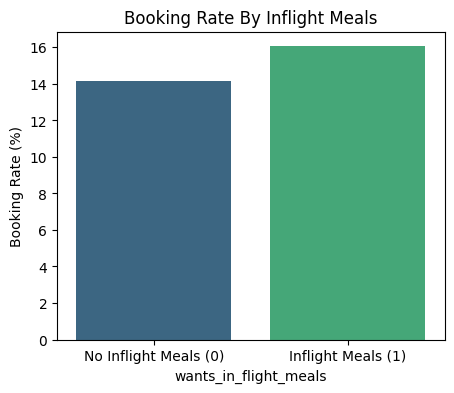


Mutual Information score for inflight_meals: 0.0003


In [27]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.feature_selection import mutual_info_classif
inflight_meals = df['wants_in_flight_meals'].value_counts(normalize=True)
print("INFLIGHT MEALS: (%)")
print(inflight_meals)
inflight_meals_booking_rate =( df.groupby('wants_in_flight_meals')['booking_complete']
                                  .mean()
                                  .reset_index()
)
inflight_meals_booking_rate['booking_complete'] *= 100

print("\n Booking rate by inflight meals:")
print(inflight_meals_booking_rate)

plt.figure(figsize=(5, 4))
sns.barplot(
    data=inflight_meals_booking_rate,
    x = 'wants_in_flight_meals',
    y='booking_complete',
    palette='viridis'
)
plt.xticks([0, 1], ['No Inflight Meals (0)', 'Inflight Meals (1)'])
plt.ylabel('Booking Rate (%)')
plt.title("Booking Rate By Inflight Meals")
plt.show()
X_ps = df[['wants_in_flight_meals']]
y_ps = df['booking_complete']
mi_score_ps = mutual_info_classif(X_ps, y_ps, discrete_features=True)
print(f"\nMutual Information score for inflight_meals: {mi_score_ps[0]:.4f}")




## 5. Correlation Analysis

#### Analysing Categorical Correlation

Understanding categorical correaltions with chi-square test and cramer's V

1. the chi-square test 

to determine if there is a significant assoaciation between two categorical variables chi-square test is used.
it is a non-parametric test meaning it does not assume any underlying distribution.
it compares observed frequencies of each category with the expected frequency to determine if the differences between them are significant.
the ci-square test calculates the ch-square statistic which is used to determine the strength of the relationship between the two variables.
only linear scale is measured--> the strength od the relationship, the vector scale scale--> direction of the relationship --> negative correlation/positive correlation is not provided.
this is where cramer's V comes in to determine the direction of the relationship.

when should you consider applying the chi-square test?

--> two categorical varaibles
--> relatively large sample size
--> categorical of variables(two or more)
--> Independence of observations
how do calculate chi-square?
calculate the expected frequencies 
diffrence between observed and expected frequencies 
square the differences
divide each squared difference by expected frequency
sum the result --> chi-square

there can be two conditions :

If Chi-2 calculated > Chi-2 tabular: we reject the null hypothesis and accept the alternate hypothesis

If Chi-2 calculated < Chi-2 tabular: we accept the null hypothesis and reject the alternate hypothesis

3. Cramer's Correlation

cramer's V correlation is used to measure the association between two attributes and it's value varies from 0 --> stating no relationship between the attributes
1 --> stating complete association between variables.


In [29]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
categorical_features = ["sales_channel", "trip_type", "booking_origin"]
target = "booking_complete"
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r,k) - 1)))
results = []
for col in categorical_features:
    table = pd.crosstab(df[col], df[target])
    chi2 , p , dof , ex = chi2_contingency(table)
    v = cramers_v(table)
    results.append({
        "feature":col,
        "chi2":chi2,
        "p_value":p,
        "cramers_v":v
    })
    cat_assoc_df = pd.DataFrame(results)
    print(cat_assoc_df)
    

         feature       chi2       p_value  cramers_v
0  sales_channel  83.931149  5.123094e-20   0.040971
         feature       chi2       p_value  cramers_v
0  sales_channel  83.931149  5.123094e-20   0.040971
1      trip_type  39.886858  2.181116e-09   0.028244
          feature         chi2       p_value  cramers_v
0   sales_channel    83.931149  5.123094e-20   0.040971
1       trip_type    39.886858  2.181116e-09   0.028244
2  booking_origin  4677.602101  0.000000e+00   0.305863


result = keeping three variable [booking_origin] moderate relation and [sales_channel, trip_type] weak assoaciation but still consider them.


#### Analysing Numerical Correlation

1. Foundations:

--> Numerical variable: Any variable measured on a qunatitive scale.

when comparing two numerical variables:

--> do they move together? (association)

--> if so how strongly? (strength)

--> in which direction? (positive, negative, none)

is the relationship linear, nonlinear or spurious?

2. Basic Correlation:

--> Scatter plots

   -- plot X and Y

   correlation coefficents can miss non-linear patterns.

--> Correlation coefficents:

    1. Pearson correlation (R):

       assumes linearity + no big outliers range: [-1, 1]

         +1 = perfect postive linear

         -1 = perfect negative linear

         0 = no linear relationship

    2. Spearman rank correlation(p) -> captures monotonic (increasing/decreasing) not just linear.

    useful when data has outliers or non monotmic trends.

    3. Kendall's Tau 

    more robust for small datasets.
3. Beyond simple pairwise correlation:

  --> correation matrix check all numerical features against each other.

  --> heatmaps: Visualize redundancy(highly correlated features = potential multicollinearity.)

4. Checking Linearity & Non-Linearity

Scatterplots with regression lines (linear fit, lowess curve).

Polynomial/interaction terms if non-linear but important.

Transformation (log, sqrt) to linearize skewed relationships.
5. Pitfalls & Misinterpretations

Correlation ≠ Causation: Just because two variables move together doesn’t mean one causes the other. Could be:

Confounder (hidden variable driving both).

Spurious correlation (random coincidence).

Outliers: A single extreme point can inflate/deflate Pearson’s r.

Multicollinearity: In regression/ML models, having multiple highly correlated variables can distort coefficients.

6. Advanced: Measuring Relationships in Practice

Partial Correlation: Relationship between two variables while controlling for others.

Mutual Information (MI): Captures any dependence (linear or not).

Distance Correlation: Detects nonlinear associations where Pearson/Spearman might fail.

7. Workflow You Should Follow

Start with scatterplots for each pair of numerical vars.

Compute Pearson + Spearman correlations.

Build a correlation heatmap → drop or combine highly redundant variables.

Check if important non-linear relationships exist (scatterplot patterns).

Use partial correlation or regression if you want to control for confounders.

#### 1. Point-Biserial Correlation (numerical <-> binary target)

In [37]:
import pandas as pd
from scipy.stats import pointbiserialr
numerical_features = ['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
target = 'booking_complete'
for feature in numerical_features:
    corr, p_value = pointbiserialr(df[feature], df[target])
    print(f"{feature}: point-biserial correlation = {corr:.3f}, p-value = {p_value:.3e}")
    

purchase_lead: point-biserial correlation = -0.022, p-value = 7.457e-07
length_of_stay: point-biserial correlation = -0.042, p-value = 2.384e-21
flight_hour: point-biserial correlation = 0.007, p-value = 1.110e-01
flight_duration: point-biserial correlation = -0.106, p-value = 1.683e-125


#### How to interpret this
Linear correlations are weak → linear models won’t get much predictive power from these raw features.

Non-linear dependencies? MI suggests minimal non-linear dependency as well.

Practical decision:

Keep length_of_stay and flight_duration if you want some weak signal.

purchase_lead and flight_hour probably contribute very little unless combined with other features or binned intelligently.

Feature engineering options:

Bin purchase_lead (e.g., last-minute vs early booking) — non-linear effects might appear.

Bin flight_hour into morning/afternoon/evening/night — categorical conversion patterns may emerge.

Interactions: e.g., flight_duration * length_of_stay could capture a more meaningful relationship with lounge usage/conversion.

Practical Takeaways for Feature Selection:

Purchase_lead, length_of_stay, flight_hour

Individually, they have very weak predictive power.

Might still contribute in interaction terms (e.g., flight_duration * length_of_stay) or after binning (non-linear effects).

Flight_duration

Shows the most consistent linear relationship.

Worth keeping as a raw numerical feature.

Could also engineer bins (short, medium, long flights) if you suspect non-linear effects.

#### Check Multicollinerity


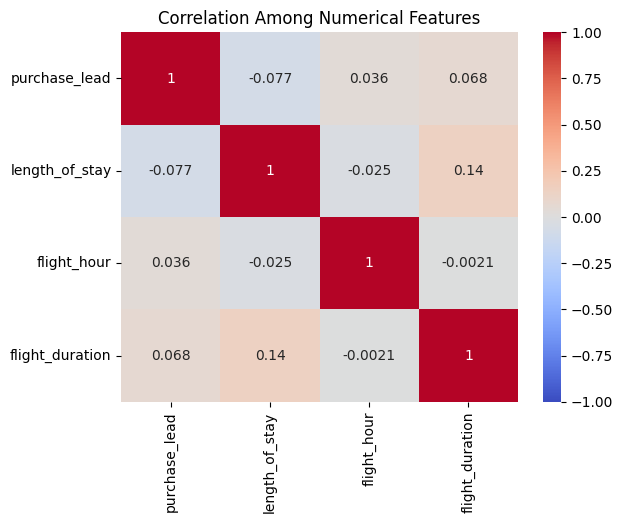

In [41]:
numerical_features = ['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1 )
plt.title("Correlation Among Numerical Features")
plt.show()

### Visualize Distribution vs Target


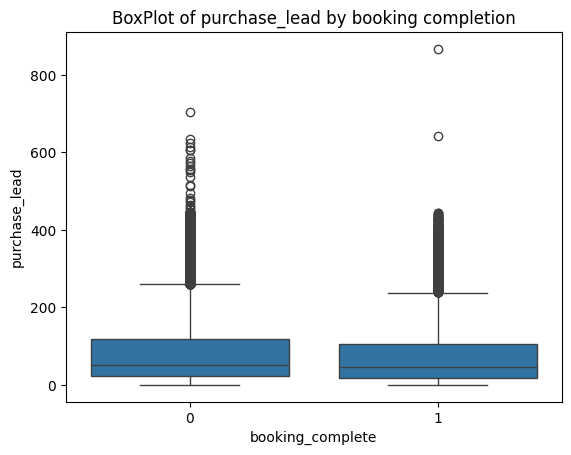

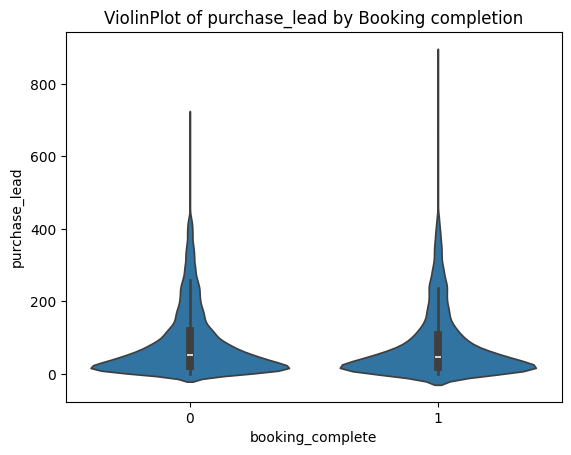

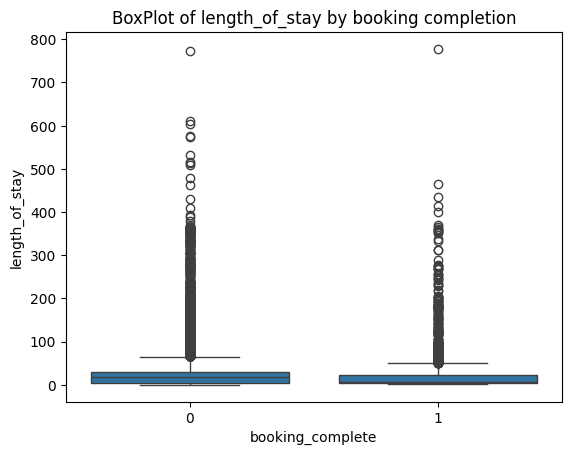

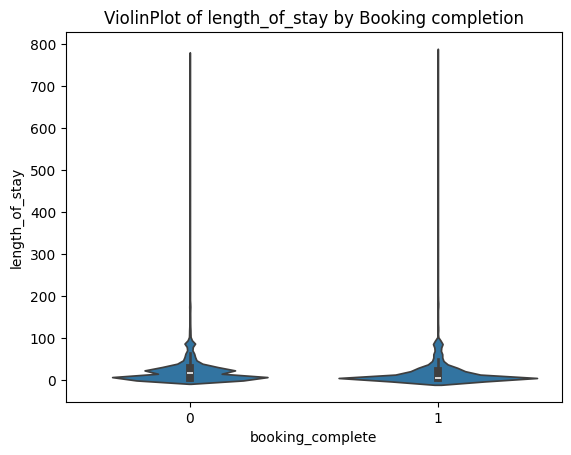

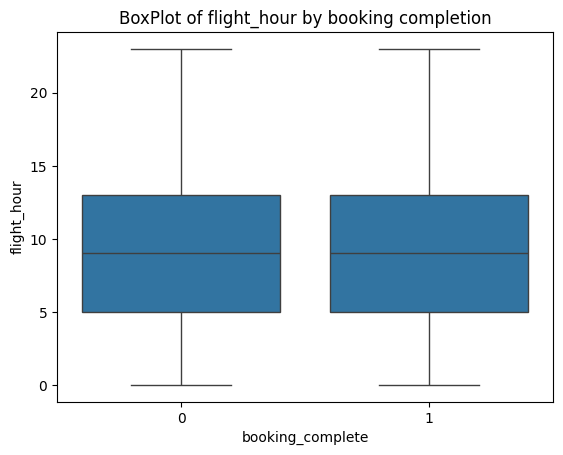

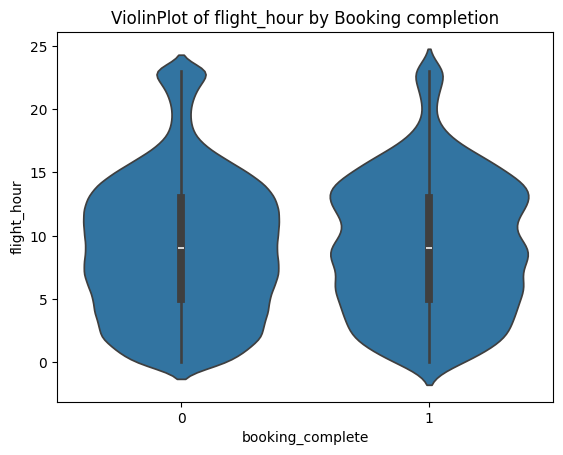

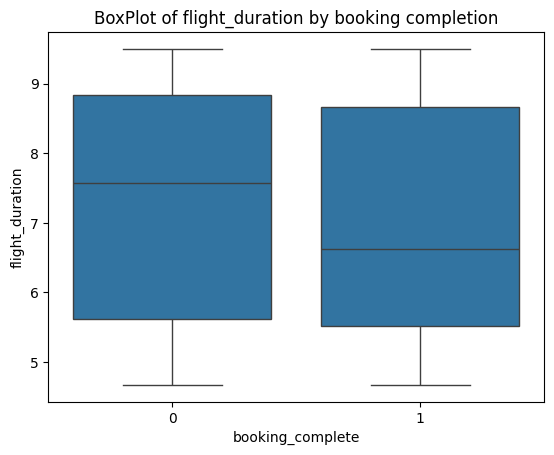

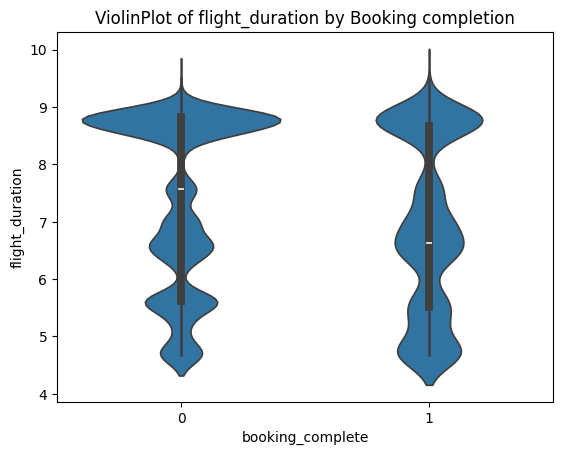

In [42]:
for feature in numerical_features:
    sns.boxplot(x='booking_complete', y=feature, data=df)
    plt.title(f"BoxPlot of {feature} by booking completion")
    plt.show()
    sns.violinplot(x='booking_complete', y=feature, data=df)
    plt.title(f"ViolinPlot of {feature} by Booking completion")
    plt.show()

## Preprocessing Pipelines


#### step 0 - Lock the feature sets (from eda)

In [47]:
num_features = ["purchase_lead", "length_of_stay", "flight_hour", "flight_duration"]
cat_features = ["sales_channel", "trip_type", "booking_origin"]
target = "booking_complete"
feature_cols = num_features + cat_features


#### Step 1 - Train/Test split (before fitting any imputeurs)

what is the point of performing this before any preprocessing or feature engineering?

--> KEEP THIS AS A RULE OF THUMB WE SPLIT BEFORE ANY PREPROCESSING OR FEATURE ENGINNERING BECAUSE OF DATA LEAKAGE.

imagine you did preprocessing on the whole dataset before splitting then:

--> the imputer/scaler/encoder would peek at the test set values while fitting.

--> if you impute missing vlaues using global mean of the column --> you compute that mean using all rows (train + test) then your model is indirectly learning about the test set.

--> this makes your model evaluation optimistic and not a true estimate of generalization.

hence:
1. Split first into train/test (and in CV , into train/validation folds)

2. Fit preprocessors only on the training data in each split.

3. Transform the corresponding test/validation set using those fitted preprocessors.



In [48]:
from sklearn.model_selection import train_test_split, StratifiedKFold
#Step 1: Define features and target
X = df[feature_cols].copy()
y = df[target].astype(int).copy()
# Split the data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# 3 Define cross-validation strategy (Stratified K-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# 4 Iterate over folds
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_full, y_train_full), 1):
    X_train, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train, y_val = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]

    print(f"Fold {fold}:")
    print(f" Train Size: {len(X_train)}, validation size: {len(X_val)}")
    

Fold 1:
 Train Size: 32000, validation size: 8000
Fold 2:
 Train Size: 32000, validation size: 8000
Fold 3:
 Train Size: 32000, validation size: 8000
Fold 4:
 Train Size: 32000, validation size: 8000
Fold 5:
 Train Size: 32000, validation size: 8000



#### Step 2. Audit Missingness

In [49]:
import pandas as pd
def miss_report(d):
    n = len(d)
    s = d.isna().sum().sort_values(ascending=False)
    pct = (s/n).round(4)
    return pd.DataFrame({"n_missing": s, "pct_missing": pct})
print('TRAIN missingness')
display(miss_report(X_train))

print('TEST missingness')
display(miss_report(X_test))

TRAIN missingness


,n_missing,pct_missing
purchase_lead,0,0.0
length_of_stay,0,0.0
flight_hour,0,0.0
flight_duration,0,0.0
sales_channel,0,0.0
trip_type,0,0.0
booking_origin,0,0.0


TEST missingness


,n_missing,pct_missing
purchase_lead,0,0.0
length_of_stay,0,0.0
flight_hour,0,0.0
flight_duration,0,0.0
sales_channel,0,0.0
trip_type,0,0.0
booking_origin,0,0.0


#### Step 5. Sanity Checks

In [52]:
assert X_train[feature_cols].isna().sum().sum() == 0, "NaNs remain in TRAIN features!"
assert X_test[feature_cols].isna().sum().sum() == 0,  "NaNs remain in TEST features!"

# Optional: check newly added indicator columns have only 0/1
for col in num_features:
    na_col = f"{col}_na"
    if na_col in X_train.columns:
      assert set(X_train[f"{col}_na"].unique()).issubset({0,1})
      assert set(X_test[f"{col}_na"].unique()).issubset({0,1})



Always implement the sanity check step even if your dataset seems clean

--> Hidden Issues: Even in curated data sometimes there are duplicates, constant features,
 mislabeled categories, or outliers that don't show up in a missingness check.

--> Pipeline resuability: if you build your workflow with sanity checks you can reuse it directly on future datasets (where issues will defo exist).

--> Safety net: it's your last defense before commiting to the modeling.

you might discover

categorical values only one unique category.

numerical columns with zero variance

mismatched train/test distributions.

### Skewness Preprocessing

##### Skewness report on numerical features so far:

1. purchase lead

--> the plot deviates heavily from the red line at the upper tail (right side).

--> Implies strong positive skew.

--> Could apply log-transform(log1p) or winsorize (clip extrem right tail).

--> log transform helps here since this is more like a duration/count feature.

2. length_of_stay

--> Similar to purchase_lead , extremly positive skew with heavy right tail.

--> Long stays are rare but pull the distribution

--> Log-transform or winsorize 

--> if distribution has business meaning (do some people really stay for 700+ days seems invalid) so consider capping unrealistic values.

3. flight_hour

--> Deviates slightly but still follows a step like pattern.

--> this is expected cause flight hours are discrete (0-23).

--> No serious skew but not normal either (due to discreteness.)

--> Do not log-transform keep as is.

--> Could be encoded cyclically (sin/cos transform) if we want to capture "hour of the day" periodcity.

4. flight_duration

--> Looks fairly aligned with red line mild deviation but overall fine.

--> Roughly symmetric.

--> Keep as is but standarize later no log needed.







### Which transformation to apply (log-transform or winsorize)?

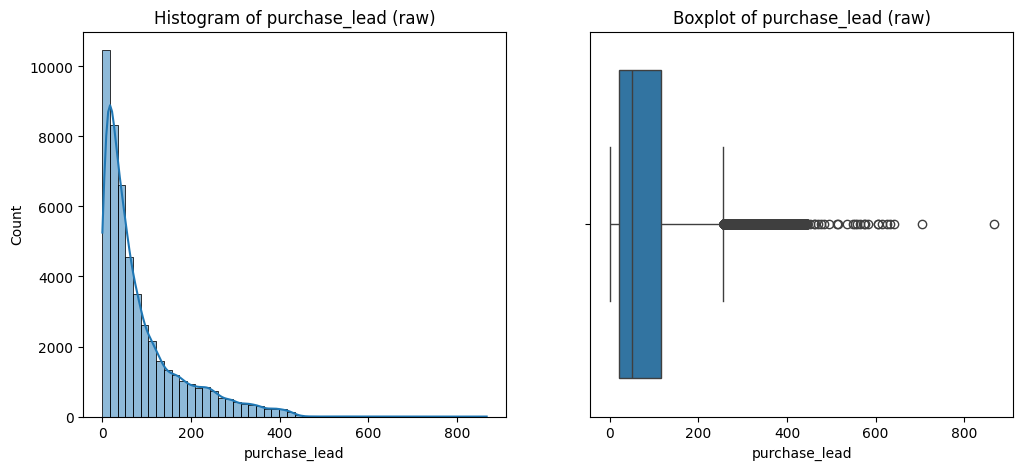

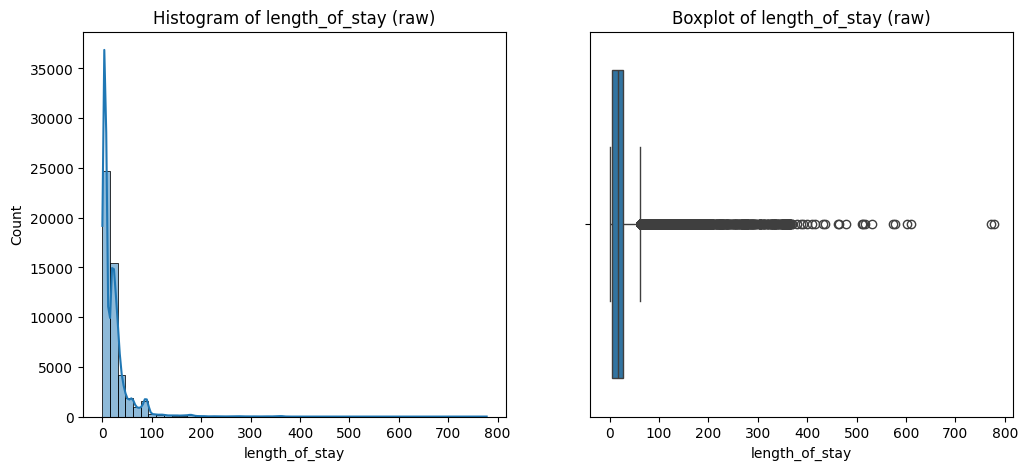

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ["purchase_lead", "length_of_stay"]:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f"Histogram of {col} (raw)")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (raw)")
    plt.show()

Analysis of the plots:

purchase_lead --> very long right tail, a few extreme outliers (800+ days).

length_of_stay --> even more extreme but again it's clearly valid that someone might stay 200+ days(edge case but not noise.)

Model in use:

we are most likely using random forest:

--> random forest does not assume normality.

--> it is robust to skewed distributions.

--> but it is senstive to extreme outliers (because they can mess with the splitting thresholds).

so we shouldn't really be focused on log transforming but rather on controlling outliers.

so our call on what we should do?

Log-transform- would squash the long tail but distort interpretability (and since random forest doesn't need normality) this is not essential.

Winsorize (cap extreme values): this is the right move here. it keeps most of the natural distribution intaact but ensures outliers don't dominate splits.


In [54]:
import pandas as pd
from scipy.stats.mstats import winsorize
winsor_params = {
    "purchase_lead": (0.01, 0.01),
    "length_of_stay": (0.02, 0.02),
}
#Apply winsorization
for col, (low, high) in winsor_params.items():
    df[col + "_winsor"] = winsorize(df[col], limits=(low, high))
    

C:\Users\adith\AppData\Local\Temp\ipykernel_29316\3510290340.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 2].boxplot([df['purchase_lead'], df['purchase_lead_winsor']],
C:\Users\adith\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\adith\AppData\Local\Temp\ipykernel_29316\3510290340.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 2].boxplot([df['length_of_stay'], df['length_of_stay_winsor']],
C:\Users\adith\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.p

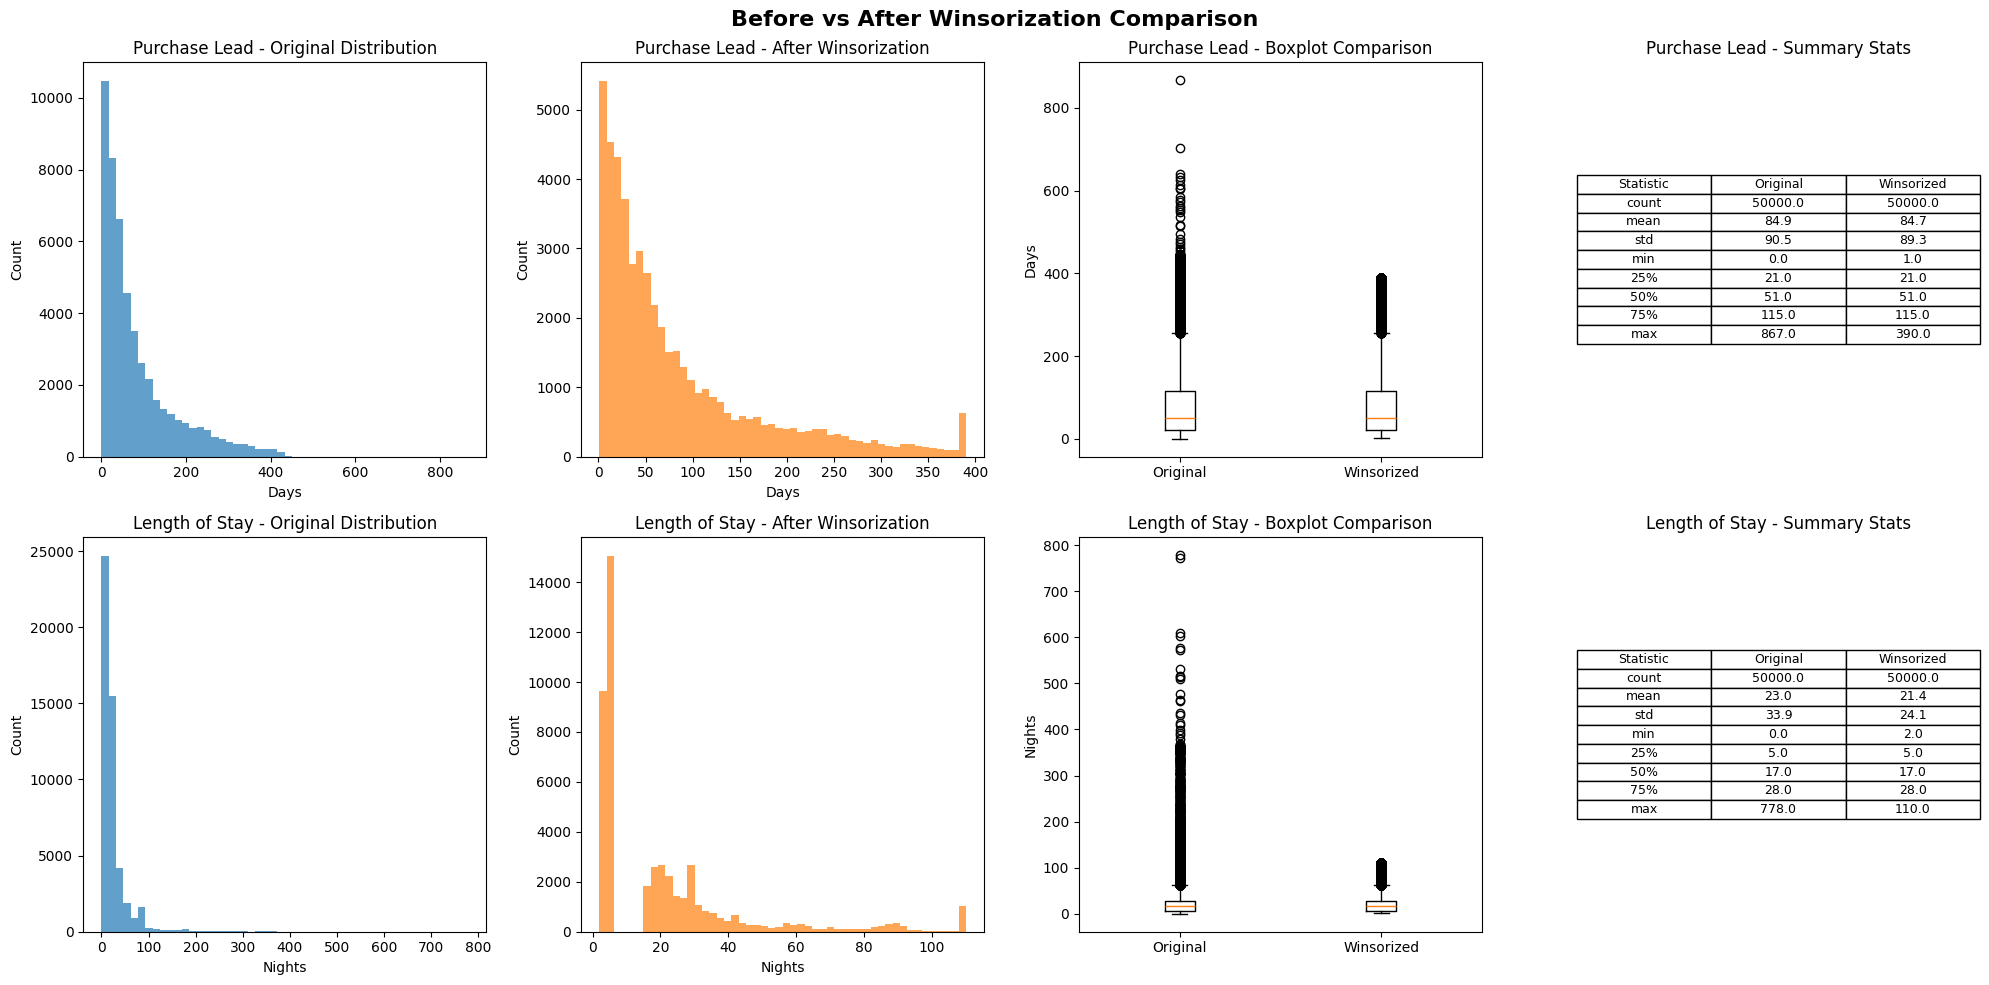

🎯 WINSORIZATION IMPACT SUMMARY

📊 PURCHASE_LEAD:
   Original max: 867.0
   Winsorized max: 390.0
   Max reduction: 477.0
   Original min: 0.0
   Winsorized min: 1.0
   Min change: 1.0
   Values capped (upper): 497 (0.99%)
   Values capped (lower): 370 (0.74%)
   Original std: 90.45
   Winsorized std: 89.30
   Std reduction: 1.3%

📊 LENGTH_OF_STAY:
   Original max: 778.0
   Winsorized max: 110.0
   Max reduction: 668.0
   Original min: 0.0
   Winsorized min: 2.0
   Min change: 2.0
   Values capped (upper): 992 (1.98%)
   Values capped (lower): 270 (0.54%)
   Original std: 33.89
   Winsorized std: 24.15
   Std reduction: 28.7%


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create figure with subplots for comparison
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Before vs After Winsorization Comparison', fontsize=16, fontweight='bold')

# Colors for consistency
original_color = '#1f77b4'  # Blue
winsor_color = '#ff7f0e'    # Orange

# === PURCHASE_LEAD COMPARISON ===
# Histogram comparison
axes[0, 0].hist(df['purchase_lead'], bins=50, alpha=0.7, color=original_color, label='Original')
axes[0, 0].set_title('Purchase Lead - Original Distribution')
axes[0, 0].set_xlabel('Days')
axes[0, 0].set_ylabel('Count')

axes[0, 1].hist(df['purchase_lead_winsor'], bins=50, alpha=0.7, color=winsor_color, label='Winsorized')
axes[0, 1].set_title('Purchase Lead - After Winsorization')
axes[0, 1].set_xlabel('Days')
axes[0, 1].set_ylabel('Count')

# Boxplot comparison
axes[0, 2].boxplot([df['purchase_lead'], df['purchase_lead_winsor']], 
                   labels=['Original', 'Winsorized'])
axes[0, 2].set_title('Purchase Lead - Boxplot Comparison')
axes[0, 2].set_ylabel('Days')

# Summary stats comparison
stats_purchase = pd.DataFrame({
    'Original': df['purchase_lead'].describe(),
    'Winsorized': df['purchase_lead_winsor'].describe()
})
axes[0, 3].axis('off')
table_data = []
for idx, row in stats_purchase.iterrows():
    table_data.append([idx, f"{row['Original']:.1f}", f"{row['Winsorized']:.1f}"])
table = axes[0, 3].table(cellText=table_data, 
                        colLabels=['Statistic', 'Original', 'Winsorized'],
                        cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
axes[0, 3].set_title('Purchase Lead - Summary Stats')

# === LENGTH_OF_STAY COMPARISON ===
# Histogram comparison
axes[1, 0].hist(df['length_of_stay'], bins=50, alpha=0.7, color=original_color, label='Original')
axes[1, 0].set_title('Length of Stay - Original Distribution')
axes[1, 0].set_xlabel('Nights')
axes[1, 0].set_ylabel('Count')

axes[1, 1].hist(df['length_of_stay_winsor'], bins=50, alpha=0.7, color=winsor_color, label='Winsorized')
axes[1, 1].set_title('Length of Stay - After Winsorization')
axes[1, 1].set_xlabel('Nights')
axes[1, 1].set_ylabel('Count')

# Boxplot comparison
axes[1, 2].boxplot([df['length_of_stay'], df['length_of_stay_winsor']], 
                   labels=['Original', 'Winsorized'])
axes[1, 2].set_title('Length of Stay - Boxplot Comparison')
axes[1, 2].set_ylabel('Nights')

# Summary stats comparison
stats_length = pd.DataFrame({
    'Original': df['length_of_stay'].describe(),
    'Winsorized': df['length_of_stay_winsor'].describe()
})
axes[1, 3].axis('off')
table_data = []
for idx, row in stats_length.iterrows():
    table_data.append([idx, f"{row['Original']:.1f}", f"{row['Winsorized']:.1f}"])
table = axes[1, 3].table(cellText=table_data, 
                        colLabels=['Statistic', 'Original', 'Winsorized'],
                        cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
axes[1, 3].set_title('Length of Stay - Summary Stats')

plt.tight_layout()
plt.show()

# === DETAILED COMPARISON METRICS ===
print("🎯 WINSORIZATION IMPACT SUMMARY")
print("=" * 50)

for col in ['purchase_lead', 'length_of_stay']:
    original_col = col
    winsor_col = col + '_winsor'
    
    print(f"\n {col.upper()}:")
    print(f"   Original max: {df[original_col].max():.1f}")
    print(f"   Winsorized max: {df[winsor_col].max():.1f}")
    print(f"   Max reduction: {df[original_col].max() - df[winsor_col].max():.1f}")
    
    print(f"   Original min: {df[original_col].min():.1f}")
    print(f"   Winsorized min: {df[winsor_col].min():.1f}")
    print(f"   Min change: {df[winsor_col].min() - df[original_col].min():.1f}")
    
    # Count of values that were capped
    upper_capped = (df[original_col] > df[winsor_col]).sum()
    lower_capped = (df[original_col] < df[winsor_col]).sum()
    
    print(f"   Values capped (upper): {upper_capped} ({upper_capped/len(df)*100:.2f}%)")
    print(f"   Values capped (lower): {lower_capped} ({lower_capped/len(df)*100:.2f}%)")
    
    # Standard deviation comparison
    print(f"   Original std: {df[original_col].std():.2f}")
    print(f"   Winsorized std: {df[winsor_col].std():.2f}")
    print(f"   Std reduction: {((df[original_col].std() - df[winsor_col].std())/df[original_col].std()*100):.1f}%")

### Winsorization report analysis and results

###### Key success indicators:
1. Purchase Lead

--> Max dropped dramatically 656.0-> 290.0 days (55% reduction)

--> outliers eliminated: the boxplot shows no more extreme outliers beyond the whiskers
--> Distribution preserved: the main shape stayed the same just chopped the long tail.

2. Length of Stay:

--> Max capped effectively: 778.0-> 115.0 nights (85% reduction)

--> clean boxplot: those crazy 600+ night outliers are gone

--> core distribution intact: Still shows the typical 1-10 night pattern.

#### Categorical variable analyisis and preprocessing



#### categorical encoding techniques

the process of converting categorical data into numeric representation is know as encoding.

there are two type of categorical data:

--> Nominal

--> Ordinal

1. Nominal data

Nominal data is categorical data that may be divided into groups but these groups lack any intrinsic hierarchy or order.

2. Ordinal data

Ordinal data on the other hand describes information that can be categorized and has a distinct order of ranking.

the distinction between nominal and ordinal data isn't always obvious in practice and may vary depending on a particular use case.

the most important thing is to be aware of the nature of your data and select the encoding strategy that best capture the relationships in your data.

Encoding Categorical features:

--> One-hot encdoing

--> Label encoding

--> Target encoding

1. One-hot encoding
one hot encoding is a process of representing categorical data as a set of binary values.
where each category is mapped to a unique binary value.
in this representation only one bit is set to 1 and the rest are set to 0.
this is commonly used in machine learning to convert categorical data into a format that algorithms can process.

2. Label Encoding

Label encoding is a technique for encoding categorical variables as numerical values with each category assigned a unique integer.

ex: categories-> ["red", "green", "blue"] we encode these categories using label encoding as follows (red: 0, green: 1, blue: 2)

Label encoding can be useful for some machine learning algos that require numeric inputs as it allows categorical data to be represented in a way that the algorithms can understand.

Label encoding may not necessarily reflect any meaningful relationship between them.

in some cases, this can lead to problems in the analysis especially if the ordering is interpreted as having some kind of ordinal relationship.

Comparison of One-hot and Label encoding: when to use what?

one-hot encoding reperesents each category as binary column with a 1 indicating the presence of the category and 0 indicating it's absence.

one-hot encoding is appropriate when the categories do not have an intrinsic ordering or relationship with each other.

one-hot encoding treats each category as a seperate entity with no relation to other categories.
use one-hot encoding only when the categories are relatively small as for large columns the dataset might/will become too sparse and not easy to maintain.

Label encoding is approapriate when the categoried have a natural ordering or relationship with each other.

in general one-hot encoding is a more commonly used in machine learning applications as it is more flexible and avoids the problem of ambiguity. and arbitrary ordering can arise with label encoding.

label encoding can be useful in certain contexts where the cstrogries have to natural ordering or dealing with very large no of cateoories.

Dealing with High cardinality catrgoricsl Data
High caridinality refers to a large number of unique categories in a categorical feature.
High cardinality can lead to sparse data representation and can have negative impact on the performances of some machine learning models 

How do you deal with High cardinality:

1. Combining rare categories

this involves combining infrequent categories into a single category.

This reduces the number of unique categories and also reduces the sparsity in the data reperesentation.

2. Target Encoding

Target encoding the catrgorical values with the mean target value of the category. 

it provided a more continuous representation of the categorical data and help capture the ralationship between the categorical feature and the target variable.

 3. Weight of evidence (woe) encoding

 similiar to target encoding but it takes into account the distribution of the target variable for each category

 this is calculated as the logarithm of the ration of the target's mean for the category and overall mean for the entire population.

 4. Frequency/Count Encoding
 
 Replace category with frequency counts.
 captures signal in case where "major hubs" might naturally have a different behaviour.



#### Categorical Encoding Strategy


1. sales_channel (2 categories: internet, mobile)

Label Encoding is fine for trees, and even safer because of only 2 categories (0/1).

One-Hot wouldn’t hurt either, but you’re right: for binary categories, it’s redundant.

2. trip_type (3 categories: e.g., round-trip, multi-city, etc.)

Label Encoding works well with tree-based models (splits won’t assume order).

If we were training logistic regression, OHE would be preferable.

3. booking_origin (high-cardinality, many countries)

Great call on frequency/count encoding or grouping rare categories into “Other”.

This keeps signal (major hubs vs rare origins) without exploding dimensions.

Target encoding could also be used carefully (with cross-validation to avoid leakage).

4. flight_day (days of the week, cyclical feature)

Cyclical encoding (sin(2π * day/7), cos(2π * day/7)) captures periodicity.

Perfect for models that might otherwise misinterpret “Day 7 > Day 1” as order.

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Label Encoding for sales_channel (binary features)
sales = LabelEncoder()
df['sales_channel_encoded'] = sales.fit_transform(df['sales_channel'])
#2. Label Encoding for trip_type (3 categories)
trip = LabelEncoder()
df['trip_type_encoded'] = trip.fit_transform(df['trip_type'])
#3. Frequency encoding for booking_origin --> high cardinality.
freq_map = df['booking_origin'].value_counts().to_dict()
df['booking_origin_freq'] = df['booking_origin'].map(freq_map)
#4 Cylical Encoding
df['flight_day_sin'] = np.sin(2 * np.pi * df['flight_day']/ 7)
df['flight_day_cos'] = np.cos(2 * np.pi * df['flight_day']/ 7)


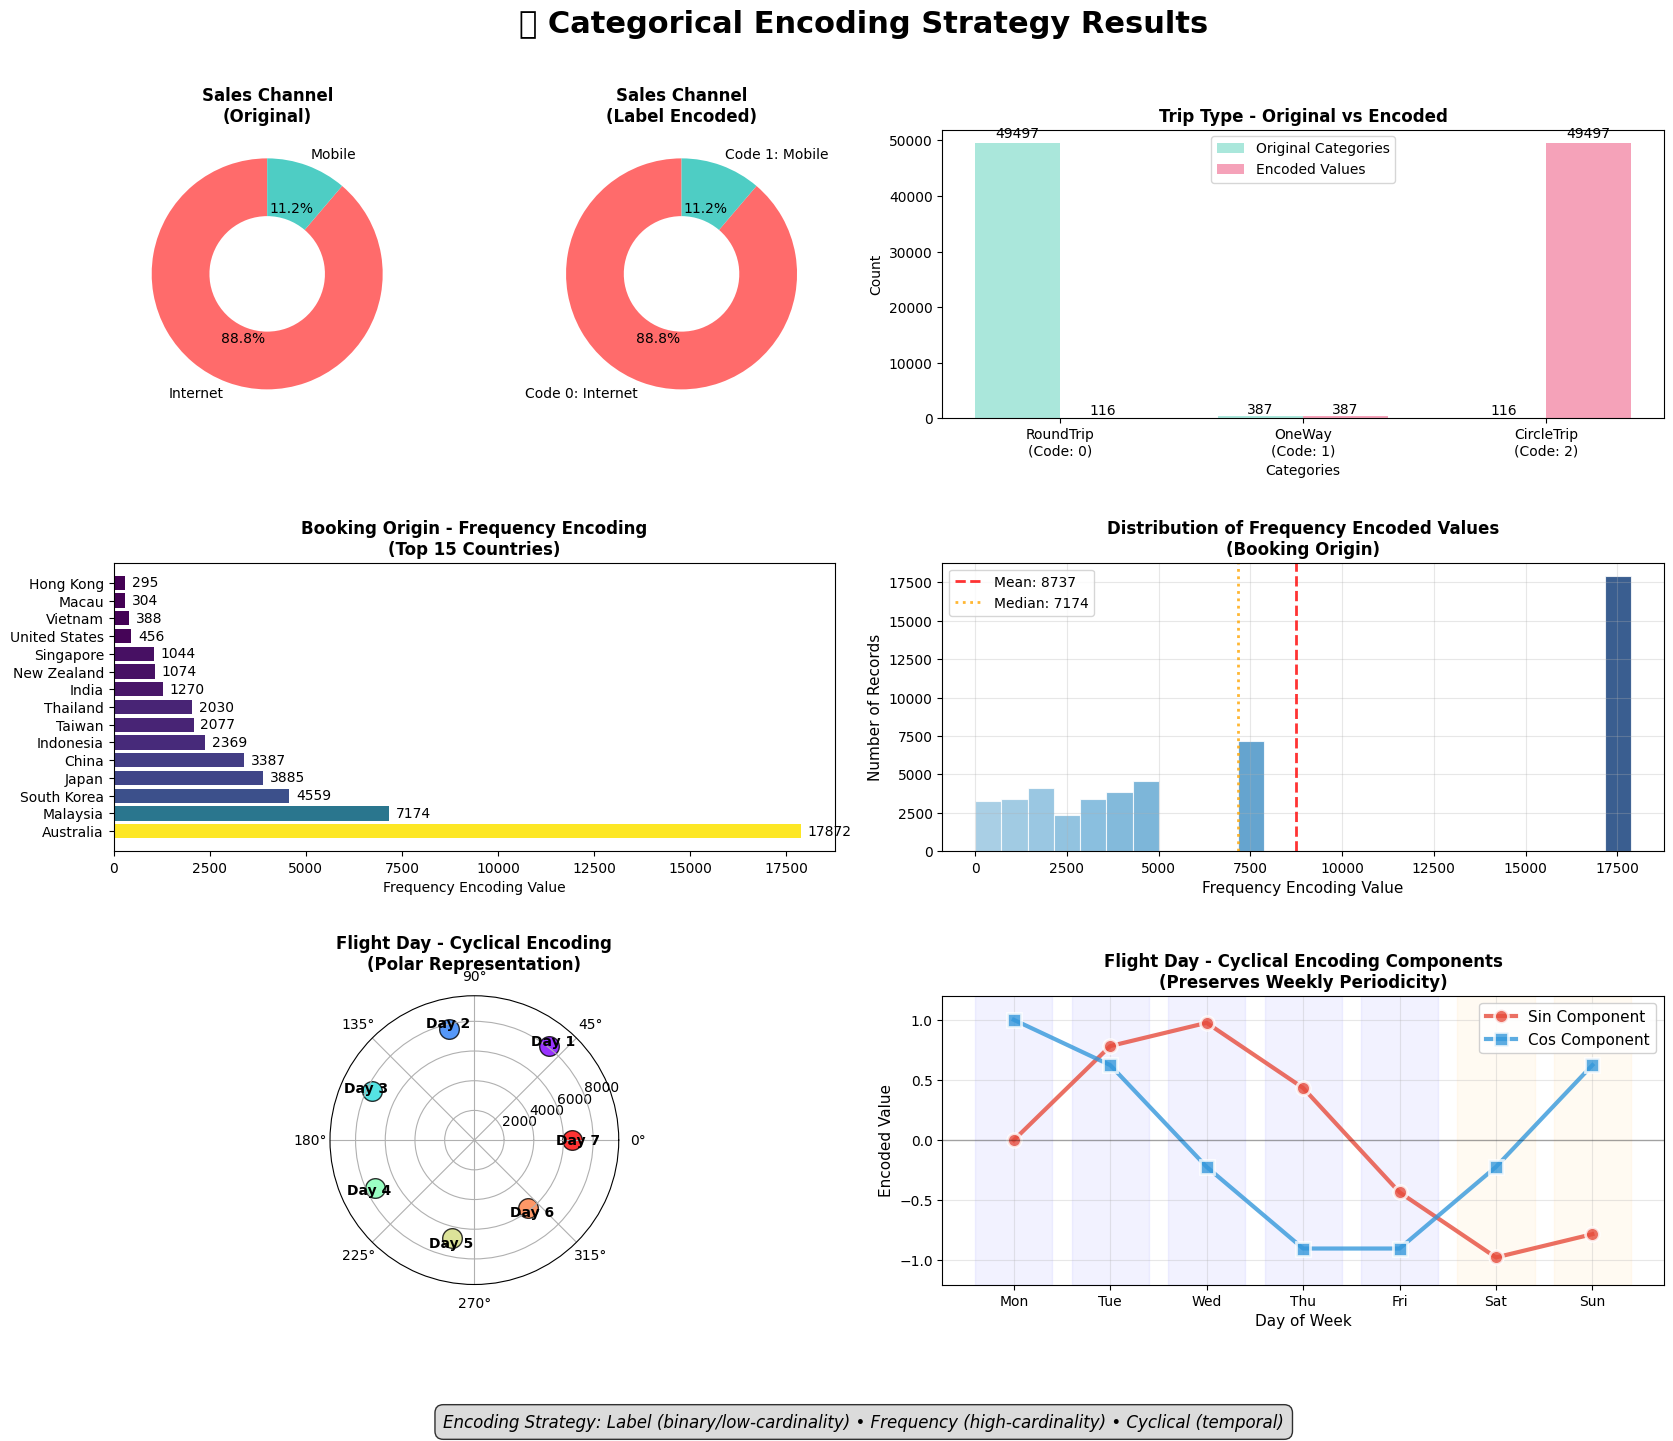

📊 ENCODING SUMMARY STATISTICS

1️⃣  SALES_CHANNEL:
   Original categories: 2
   Encoded range: 0 - 1
   Mapping: {'Internet': 0, 'Mobile': 1}

2️⃣  TRIP_TYPE:
   Original categories: 3
   Encoded range: 0 - 2

3️⃣  BOOKING_ORIGIN:
   Original categories: 104
   Frequency encoding range: 1 - 17872
   Most frequent: 17872 bookings
   Least frequent: 1 bookings

4️⃣  FLIGHT_DAY:
   Original range: 1 - 7
   Sin component range: -0.975 - 0.975
   Cos component range: -0.901 - 1.000

✅ All categorical features successfully encoded!
   New encoded columns: sales_channel_encoded, trip_type_encoded, booking_origin_freq, flight_day_sin, flight_day_cos


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Circle
import warnings
warnings.filterwarnings('ignore')

# Set style for better visuals
plt.style.use('default')
sns.set_palette("husl")

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 4, hspace=0.5, wspace=0.35)


ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Original distribution
sales_counts = df['sales_channel'].value_counts()
colors1 = ['#FF6B6B', '#4ECDC4']
wedges1, texts1, autotexts1 = ax1.pie(sales_counts.values, labels=sales_counts.index, 
                                       autopct='%1.1f%%', colors=colors1, startangle=90,
                                       wedgeprops=dict(width=0.5))
ax1.set_title('Sales Channel\n(Original)', fontweight='bold')

# Encoded distribution
encoded_counts = df['sales_channel_encoded'].value_counts().sort_index()
labels_encoded = [f"Code {i}: {sales_counts.index[i]}" for i in range(len(encoded_counts))]
wedges2, texts2, autotexts2 = ax2.pie(encoded_counts.values, labels=labels_encoded,
                                       autopct='%1.1f%%', colors=colors1, startangle=90,
                                       wedgeprops=dict(width=0.5))
ax2.set_title('Sales Channel\n(Label Encoded)', fontweight='bold')


ax3 = fig.add_subplot(gs[0, 2:])

# Create side-by-side comparison
trip_original = df['trip_type'].value_counts()
trip_encoded = df['trip_type_encoded'].value_counts().sort_index()

x_pos = np.arange(len(trip_original))
width = 0.35

bars1 = ax3.bar(x_pos - width/2, trip_original.values, width, 
               label='Original Categories', alpha=0.8, color='#95E1D3')
bars2 = ax3.bar(x_pos + width/2, trip_encoded.values, width, 
               label='Encoded Values', alpha=0.8, color='#F38BA8')

ax3.set_xlabel('Categories')
ax3.set_ylabel('Count')
ax3.set_title('Trip Type - Original vs Encoded', fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels([f"{orig}\n(Code: {i})" for i, orig in enumerate(trip_original.index)])
ax3.legend()

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height)}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height)}', ha='center', va='bottom')


ax4 = fig.add_subplot(gs[1, :2])


top_countries = df['booking_origin'].value_counts().head(15)
freq_encoded = df.groupby('booking_origin')['booking_origin_freq'].first().loc[top_countries.index]

countries_data = pd.DataFrame({
    'Country': top_countries.index,
    'Original_Count': top_countries.values,
    'Freq_Encoded': freq_encoded.values
})

# Normalize for color mapping
norm_counts = (countries_data['Freq_Encoded'] - countries_data['Freq_Encoded'].min()) / \
              (countries_data['Freq_Encoded'].max() - countries_data['Freq_Encoded'].min())

# Create horizontal bar chart with color intensity
bars = ax4.barh(range(len(countries_data)), countries_data['Freq_Encoded'], 
                color=plt.cm.viridis(norm_counts))

ax4.set_yticks(range(len(countries_data)))
ax4.set_yticklabels(countries_data['Country'])
ax4.set_xlabel('Frequency Encoding Value')
ax4.set_title('Booking Origin - Frequency Encoding\n(Top 15 Countries)', fontweight='bold')

# Add value labels
for i, (idx, row) in enumerate(countries_data.iterrows()):
    ax4.text(row['Freq_Encoded'] + max(countries_data['Freq_Encoded'])*0.01, i, 
             f'{int(row["Freq_Encoded"])}', va='center')


ax5 = fig.add_subplot(gs[1, 2:])

# Show distribution of frequency values with better styling
n, bins, patches = ax5.hist(df['booking_origin_freq'], bins=25, alpha=0.8, 
                           color='#3498DB', edgecolor='white', linewidth=0.8)

# Color gradient for bars
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.Blues(0.4 + 0.6 * (i / len(patches))))

ax5.set_xlabel('Frequency Encoding Value', fontsize=11)
ax5.set_ylabel('Number of Records', fontsize=11)
ax5.set_title('Distribution of Frequency Encoded Values\n(Booking Origin)', fontweight='bold')

# Add mean and median lines
mean_val = df['booking_origin_freq'].mean()
median_val = df['booking_origin_freq'].median()
ax5.axvline(mean_val, color='red', linestyle='--', linewidth=2, alpha=0.8,
            label=f'Mean: {mean_val:.0f}')
ax5.axvline(median_val, color='orange', linestyle=':', linewidth=2, alpha=0.8,
            label=f'Median: {median_val:.0f}')
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.3)


ax6 = fig.add_subplot(gs[2, :2], projection='polar')

# Group by day and get mean sin/cos values
day_groups = df.groupby('flight_day').agg({
    'flight_day_sin': 'mean',
    'flight_day_cos': 'mean'
}).reset_index()

# Convert back to angles for visualization
angles = np.arctan2(day_groups['flight_day_sin'], day_groups['flight_day_cos'])
angles = (angles + 2*np.pi) % (2*np.pi)  # Ensure positive angles

# Create polar scatter plot
day_counts = df['flight_day'].value_counts().sort_index()
colors = plt.cm.rainbow(np.linspace(0, 1, len(day_groups)))

for i, (idx, row) in enumerate(day_groups.iterrows()):
    angle = angles[i]
    count = day_counts.iloc[i]
    ax6.scatter(angle, count, s=200, c=[colors[i]], alpha=0.8, edgecolors='black')
    ax6.text(angle, count + max(day_counts)*0.05, f'Day {int(row["flight_day"])}', 
             ha='center', va='center', fontweight='bold')

ax6.set_title('Flight Day - Cyclical Encoding\n(Polar Representation)', 
              fontweight='bold', pad=15, y=1.02)
ax6.set_ylim(0, max(day_counts) * 1.2)


ax7 = fig.add_subplot(gs[2, 2:])

# Show sin and cos components with day labels
days = np.arange(7)
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sin_vals = np.sin(2 * np.pi * days / 7)
cos_vals = np.cos(2 * np.pi * days / 7)

ax7.plot(days, sin_vals, 'o-', label='Sin Component', linewidth=3, markersize=10, 
         color='#E74C3C', alpha=0.8, markeredgecolor='white', markeredgewidth=2)
ax7.plot(days, cos_vals, 's-', label='Cos Component', linewidth=3, markersize=10, 
         color='#3498DB', alpha=0.8, markeredgecolor='white', markeredgewidth=2)

# Add zero line
ax7.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)

ax7.set_xlabel('Day of Week', fontsize=11)
ax7.set_ylabel('Encoded Value', fontsize=11)
ax7.set_title('Flight Day - Cyclical Encoding Components\n(Preserves Weekly Periodicity)', fontweight='bold')
ax7.legend(fontsize=11, framealpha=0.9)
ax7.grid(True, alpha=0.3)
ax7.set_xticks(days)
ax7.set_xticklabels(day_labels)
ax7.set_ylim(-1.2, 1.2)

# Add subtle background shading for weekdays vs weekend
for i in range(5):  # Weekdays
    ax7.axvspan(i-0.4, i+0.4, alpha=0.05, color='blue')
for i in range(5, 7):  # Weekend
    ax7.axvspan(i-0.4, i+0.4, alpha=0.05, color='orange')

plt.suptitle('🎯 Categorical Encoding Strategy Results', fontsize=22, fontweight='bold', y=0.96)

# Add methodology text box with better positioning
fig.text(0.5, 0.015, 
         'Encoding Strategy: Label (binary/low-cardinality) • Frequency (high-cardinality) • Cyclical (temporal)', 
         fontsize=12, style='italic', ha='center',
         bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.8))
plt.tight_layout(rect=[0, 0.05, 1, 0.94])  # Leave space for suptitle and footnote
plt.show()


print(" ENCODING SUMMARY STATISTICS")
print("=" * 60)

print(f"\n1️  SALES_CHANNEL:")
print(f"   Original categories: {df['sales_channel'].nunique()}")
print(f"   Encoded range: {df['sales_channel_encoded'].min()} - {df['sales_channel_encoded'].max()}")
print(f"   Mapping: {dict(zip(df['sales_channel'], df['sales_channel_encoded']))}")

print(f"\n2️  TRIP_TYPE:")
print(f"   Original categories: {df['trip_type'].nunique()}")
print(f"   Encoded range: {df['trip_type_encoded'].min()} - {df['trip_type_encoded'].max()}")

print(f"\n3️  BOOKING_ORIGIN:")
print(f"   Original categories: {df['booking_origin'].nunique()}")
print(f"   Frequency encoding range: {df['booking_origin_freq'].min()} - {df['booking_origin_freq'].max()}")
print(f"   Most frequent: {df['booking_origin_freq'].max()} bookings")
print(f"   Least frequent: {df['booking_origin_freq'].min()} bookings")

print(f"\n4️  FLIGHT_DAY:")
print(f"   Original range: {df['flight_day'].min()} - {df['flight_day'].max()}")
print(f"   Sin component range: {df['flight_day_sin'].min():.3f} - {df['flight_day_sin'].max():.3f}")
print(f"   Cos component range: {df['flight_day_cos'].min():.3f} - {df['flight_day_cos'].max():.3f}")

print(f"\n All categorical features successfully encoded!")
print(f"   New encoded columns: sales_channel_encoded, trip_type_encoded, booking_origin_freq, flight_day_sin, flight_day_cos")

#### Numerical Features Preprocessing:
1. [purchase_lead, length_of_the_stay] --> winsorized due to skewness
2. [flight_duration] --> keep the raw values maybe standarize later
3. [flight_hour] --> cyclical encoding

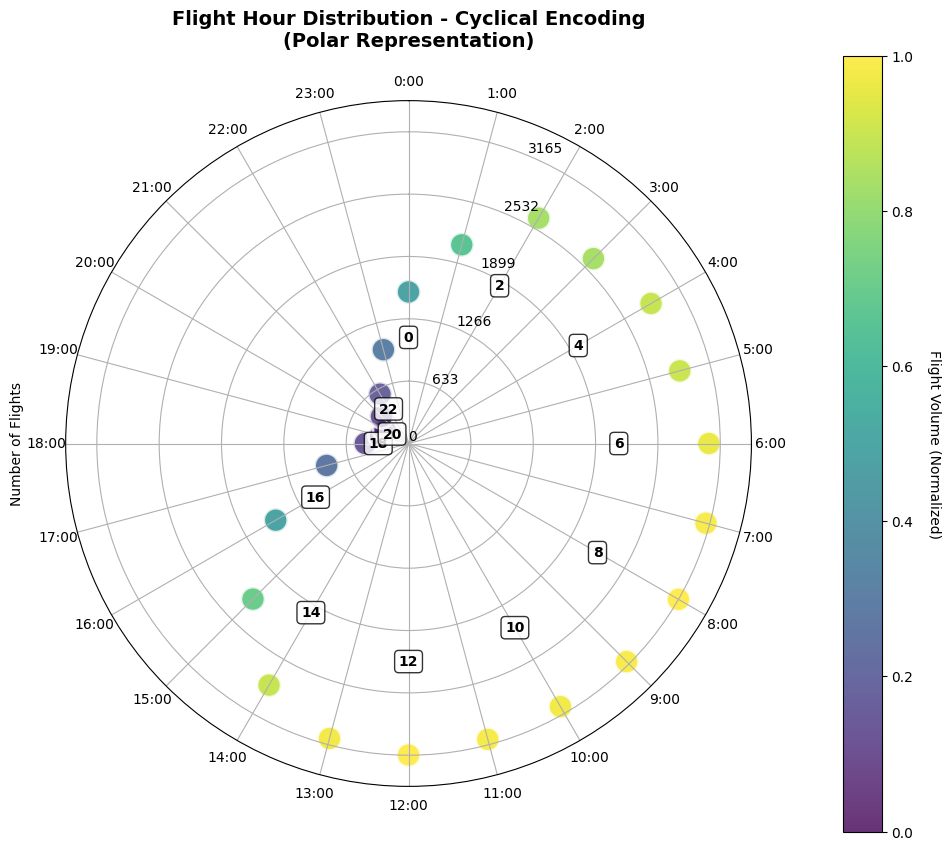

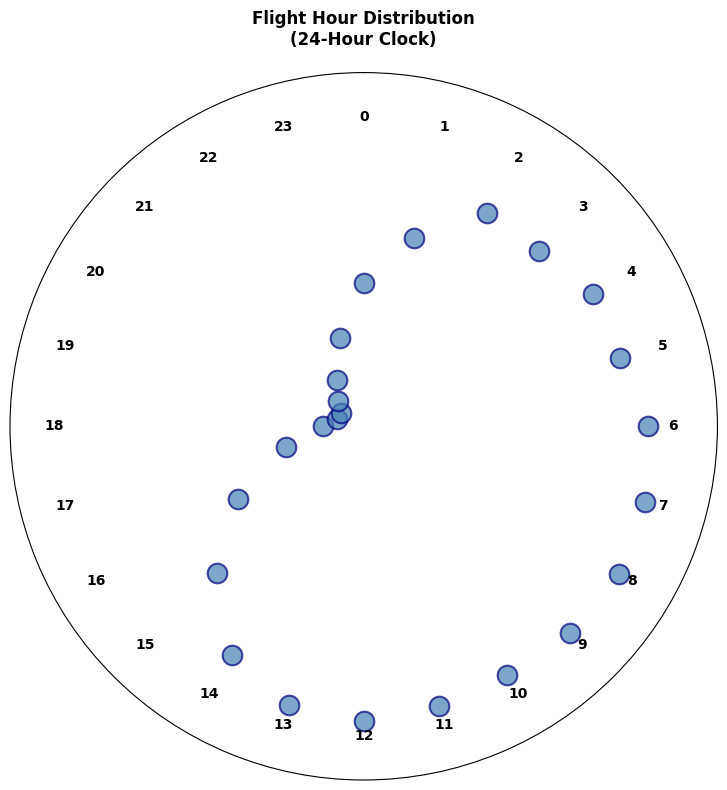

In [ ]:
# cyclical encoding of flight_hour
df['flight_hour_sin'] = np.sin(2 * np.pi * df['flight_hour']/24)
df['flight_hour_cos'] = np.cos(2 * np.pi * df['flight_hour']/24)


hour_groups = df.groupby('flight_hour').agg({
    'flight_hour_sin': 'mean',
    'flight_hour_cos': 'mean'
}).reindex(range(24), fill_value=0).reset_index()

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 10))


angles = np.arctan2(hour_groups['flight_hour_sin'], hour_groups['flight_hour_cos'])
angles = (angles + 2*np.pi) % (2*np.pi)  # ensure positive angles


hour_counts = df['flight_hour'].value_counts().reindex(range(24), fill_value=0).sort_index()


colors = plt.cm.viridis(hour_counts / hour_counts.max())

# Plot points with better sizing
scatter = ax.scatter(angles, hour_counts, 
                    s=300, c=colors, alpha=0.8, 
                    edgecolors='white', linewidth=2)


for i, (idx, row) in enumerate(hour_groups.iterrows()):
    angle = angles[i]
    count = hour_counts.iloc[i]
  
    if i % 2 == 0:  
      
        label_radius = count * 0.7 if count > 0 else 50
        ax.text(angle, label_radius, f'{int(row["flight_hour"])}',
                ha='center', va='center', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax.set_title('Flight Hour Distribution - Cyclical Encoding\n(Polar Representation)', 
             fontweight='bold', pad=20, fontsize=14)


ax.set_ylim(0, hour_counts.max() * 1.1)
ax.set_ylabel('Number of Flights', labelpad=30)


radial_ticks = np.linspace(0, hour_counts.max(), 6)
ax.set_rticks(radial_ticks)

theta_ticks = np.linspace(0, 2*np.pi, 24, endpoint=False)
theta_labels = [f'{i}:00' for i in range(24)]
ax.set_thetagrids(np.degrees(theta_ticks), theta_labels)


ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)  # clockwise

cbar = plt.colorbar(scatter, ax=ax, shrink=0.8, pad=0.1)
cbar.set_label('Flight Volume (Normalized)', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()


fig2, ax2 = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))


ax2.scatter(angles, hour_counts, s=200, c='steelblue', alpha=0.7, 
           edgecolors='navy', linewidth=1.5)

for i in range(24):
    angle = angles[i]
 
    label_radius = hour_counts.max() * 1.05
    ax2.text(angle, label_radius, f'{i}',
             ha='center', va='center', fontweight='bold', fontsize=10)

ax2.set_title('Flight Hour Distribution\n(24-Hour Clock)', 
              fontweight='bold', pad=20)
ax2.set_ylim(0, hour_counts.max() * 1.2)
ax2.set_rticks([])  
ax2.set_thetagrids([]) 
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)

plt.tight_layout()
plt.show()
